En el primer proyecto entregado utilizamos el dataset de manera tal que llegamos a crear modelos encillos de predicción de un precio o valor de determinado tipo de propiedad. Allí habiamos realizado el EDA, visto las distrinuciones de las variables y sus relaciones.

Ahora bien, habiendo llegado a esta instancia intentaremos utra manera de preprocesar los datos con el fin de mejorar el desempeño del modelo logrado anteriormene y obtener una perspectiva más exhaustiva del problema


In [ ]:
#!pip install -U scikit-learn

In [ ]:
#!pip install scikit-learn==0.22

In [1]:
!pip install -U yellowbrick

     |████████████████████████████████| 271 kB 5.1 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [2]:
#importo las librerias
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
import warnings
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error #mean_absolute_percentage_error

warnings.filterwarnings(action="ignore")
pd.set_option("float_format", '{:.2f}'.format)

In [4]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

Volvemos a tomar el dataset original. Recordemos que en el proyecto anterior tomamos, para aplicar el modelo creado, del dataset sólo los datos que se correspondian con tres diferentes tipos de propiedad (Casa, PH y Deparamento) de una sola region (Ciudad de Buenos Aires)

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataproperati = pd.read_csv('/content/drive/MyDrive/Acamica/DS_Proyecto_01_Datos_Properati.csv')

In [7]:
print("Cantidad de filas y columnas",dataproperati.shape) #<--- filas y columnas del DF
print("Tamaño del DataSet", dataproperati.size)#<--- cantidd de datos del DF
print("nombre de las variables dedataset - columnas", dataproperati.keys())#<--- Nombre de las columnas del DF
dataproperati.head() #<--- primeras 5 instancias
dataproperati.head()

Cantidad de filas y columnas (146660, 19)
Tamaño del DataSet 2786540
nombre de las variables dedataset - columnas Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.61,-58.38,Argentina,Capital Federal,San Cristobal,7.00,7.00,2.00,140.00,140.00,153000.00,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.62,-58.41,Argentina,Capital Federal,Boedo,2.00,1.00,2.00,70.00,58.00,159000.00,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.43,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,45.00,45.00,125000.00,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.58,-58.44,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,85.00,50.00,295000.00,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.91,-57.94,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.00,1.00,1.00,50.00,35.00,40000.00,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
#dataproperati=pd.read_csv("DS_Proyecto_01_Datos_Properati-2.csv")


Requiero conocer las características de mi dataset: qué tipos de datos contiene, columnas (nombre y cantidad) si exiten valores nulos, dónde y cuántos, cantidad de datos por columnas, etc.

In [ ]:
dataproperati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

### Elimino columnas por ser irrelevantes en términos estadísticos:

   
Quitar columnas que no sean relevantes:
*start date*, *end_date*, *created_on*, *lat*, *lon*, *l1*, *currency*, *operation-type*, *description* y *tittle*: En cuanto a las fechas (inicio y fin de la publicación y fecha de creación de la misma no brinda datos que sean útiles a la hora de buscar predecir el precio de la unidad.
En cuanto a *currency*, *operation_type* y *l1*: todas las instancias tienen los mismos datos (moneda = dólares, pais = Argentina, tipo de operacion = venta) 

*description* y *tittle*: no conforma una categoría, los usuarios pueden escribir lo que quieran (de hecho existen 77733 y 106668 tipos de titulos y descripciones) . No brinda informacion que nos sea útil (lo que nos interesa se encuentra en region, zona, cantidad de dormitorios, tipo de propiedad, etc). Codificar las columnas que presentan diferentes datos generaria un costo innecesario en cuanto al tipo de información que brindan

In [ ]:
dataproperati.describe(exclude="number")

,start_date,end_date,created_on,l1,l2,l3,currency,title,description,property_type,operation_type
count,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660
unique,366,412,366,1,4,89,1,77733,106668,10,1
top,2019-07-31,9999-12-31,2019-07-31,Argentina,Capital Federal,Palermo,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,11022,25101,11022,146660,92539,13073,146660,5064,235,107326,146660


In [ ]:
dataproperati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

*** Elimino columnas estadisticamente irrelevantes *** 

In [7]:
dataproperati.drop(['lat', 'lon', 'l1','start_date', 'end_date','currency', 'title', 'description' ,'operation_type','created_on' ], axis=1, inplace = True)

In [ ]:
dataproperati['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Por otra parte, y en vistas a la dificultar que traería aparejada a la hora de realizar el preprocesamiento, procedemos a dar tratamiento a la columna 'Property_type'. En este caso, esa variable contiene 10 tipos de propiedades, de las cuales las más significativas son "Departamento" en primer lugar, 'PH' y 'casa'.

Se puede visualizar su distribución en el gráfico a continuación



<function matplotlib.pyplot.show>

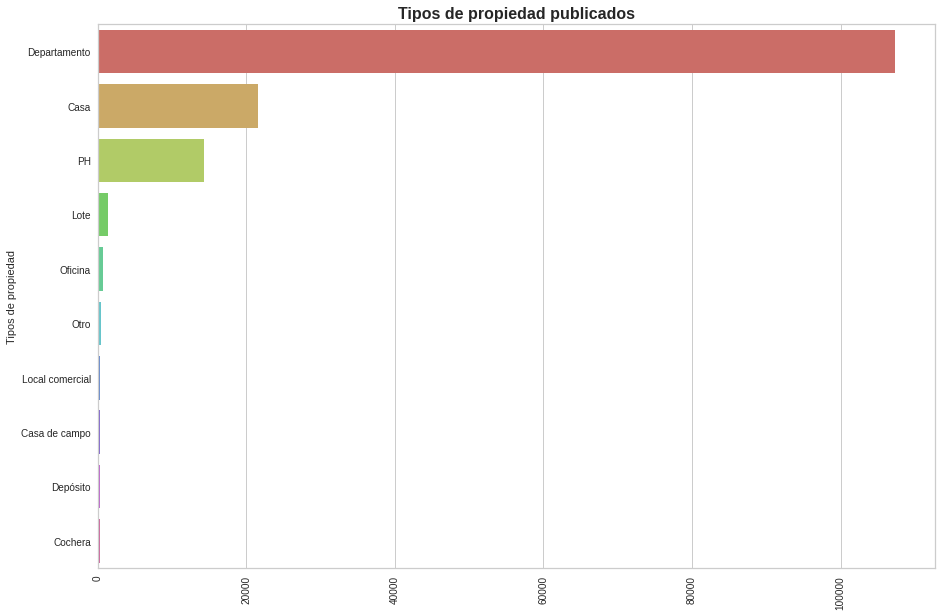

In [ ]:

#-----> Distribución de la variable property_type
fig= plt.figure(figsize=(15,10))
fig.tight_layout()
sns.countplot(y = "property_type", data = dataproperati,order= dataproperati['property_type'].value_counts().index, palette = "hls",saturation=0.75) 
plt.title('Tipos de propiedad publicados',fontsize=16, weight="bold") 

plt.ylabel('Tipos de propiedad')
plt.xlabel('')
plt.xticks(rotation = 90)
plt.show


A simple vista se puede ver que las demas categorias, las publicaciones no incluidas en "casa", "Departamento", y "PH", contienen las menor cantidad de datos.

Una estrategia es aguparlas en una subcategoría: 'otros', procurando que se respete la distribución original.


In [ ]:

# Para reformular la variable 'property_type' en el ds: 
property_typeR = dataproperati['property_type'].value_counts().nlargest(3).index
dataproperati['property_type'] = dataproperati['property_type'].where(dataproperati['property_type'].isin(property_typeR), other='Otros') 
# traducción = creo var property_typeR con 3 subcategorías de variable property_type
#luego dataproperati['propery_type'] es tal en tanto que coincida (.isin()) con los valores de property_typeR. Los demás quedan el "Otros"


<function matplotlib.pyplot.show>

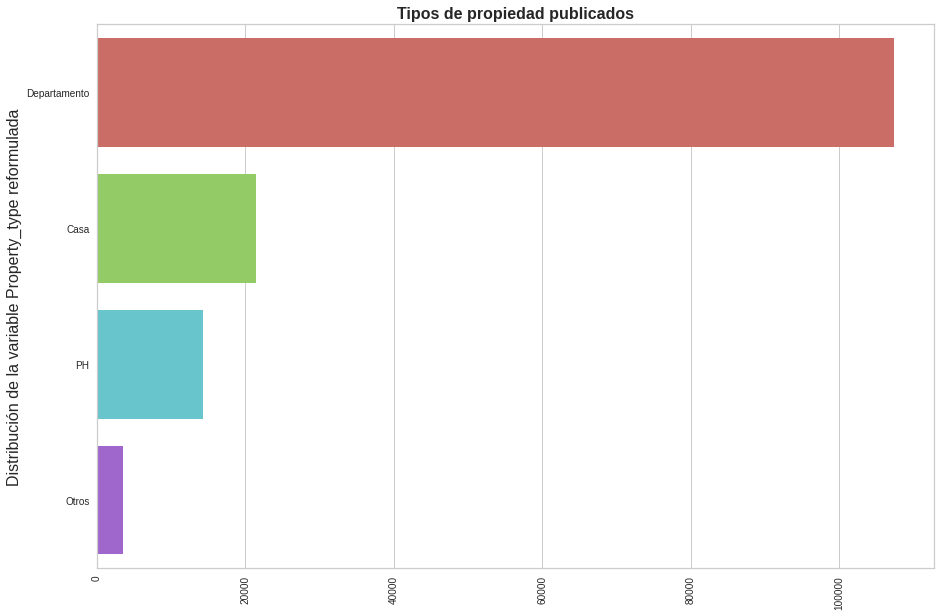

In [ ]:
fig= plt.figure(figsize=(15,10))
fig.tight_layout()
sns.countplot(y = "property_type", data = dataproperati,order= dataproperati['property_type'].value_counts().index, palette = "hls",saturation=0.75) 
plt.title('Tipos de propiedad publicados',fontsize=16, weight="bold") 

plt.ylabel('Distribución de la variable Property_type reformulada', fontsize = 16)
plt.xlabel('')
plt.xticks(rotation = 90)
plt.show


In [ ]:
dataproperati['property_type'].value_counts()

Departamento    107326
Casa             21521
PH               14298
Otros             3515
Name: property_type, dtype: int64

In [ ]:
(dataproperati['property_type']=='Otros').value_counts() * 100 / ((dataproperati['property_type']=='Departamento').value_counts() + (dataproperati['property_type']=='Casa').value_counts() + (dataproperati['property_type']=='PH').value_counts())

False   48.22
True     2.46
Name: property_type, dtype: float64

Tenemos que la categoría 'Otros' sólo agrupa el 2.4 % de los datos totales. 

Debido a que en si misma contiene datos muy diferentes entre si (de diferentes categorías a que se trata de propiedades muy diferentes) procedemos a eliminarla.


In [8]:
mask=dataproperati[((dataproperati.property_type == "Departamento") | (dataproperati.property_type == "PH") | (dataproperati.property_type == "Casa"))]  
dataproperati=pd.DataFrame(mask)
dataproperati.head()
dataproperati.size #su tamaño
dataproperati.shape #filas y columnas


(143145, 9)

Ya tenemos el dataset filtrado segun el tipo de propiedad.

In [ ]:
dataproperati['property_type'].value_counts()

Departamento    107326
Casa             21521
PH               14298
Name: property_type, dtype: int64

In [ ]:
dataproperati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143145 entries, 0 to 146659
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   l2               143145 non-null  object 
 1   l3               143145 non-null  object 
 2   rooms            143145 non-null  float64
 3   bedrooms         143145 non-null  float64
 4   bathrooms        138934 non-null  float64
 5   surface_total    124522 non-null  float64
 6   surface_covered  124236 non-null  float64
 7   price            143145 non-null  float64
 8   property_type    143145 non-null  object 
dtypes: float64(6), object(3)
memory usage: 10.9+ MB


Las columnas 'bathrooms', 'surface_total' y 'surface_covered' poseen datos faltates. Por otra parte, todas las columnas con datos faltantes son variables numéricas

In [ ]:
print(dataproperati.isnull().values.any()) # <----- existen datos faltamtes en el df?

True


In [ ]:
#cantidad de datos missing por columna
nan_count = dataproperati.isna().sum()
nan_count = nan_count[nan_count!=0]
nan_count


bathrooms           4211
surface_total      18623
surface_covered    18909
dtype: int64

In [ ]:
#porcentaje de datos missing por columna
nan_count_porcentaje = dataproperati.isna().mean() * 100 
nan_count_porcentaje = nan_count_porcentaje[nan_count_porcentaje!=0]
nan_count_porcentaje


bathrooms          2.94
surface_total     13.01
surface_covered   13.21
dtype: float64

Conocer el porcentaje de datos faltantes por columna es útil para decidir qué hacer con ellos: en gral, si sobrepasan el 20 % madificaria la distribución de los datos y, en ese caso, no corresponde eliminar sino imputar.

In [ ]:
# en una tabla, para mejor visualizacion
nan_tabla = pd.concat([pd.DataFrame(nan_count), pd.DataFrame(nan_count_porcentaje)], axis=1)
nan_tabla.columns = ['cantidad', 'porcentaje']
nan_tabla.sort_values('cantidad', ascending=False, inplace=True)
nan_tabla


,cantidad,porcentaje
surface_covered,18909,13.21
surface_total,18623,13.01
bathrooms,4211,2.94


In [ ]:
!pip install plotly_express

In [ ]:
import plotly_express as px

In [ ]:
px.bar(nan_tabla.reset_index(), x='index', y='porcentaje', text='cantidad', height=400)

Estadísticos: 

In [ ]:
dataproperati.describe() #estadisticos de v. numéricas


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,143145.00,143145.00,138934.00,124522.00,124236.00,143145.00
mean,3.10,2.00,1.60,182.38,112.37,237818.38
std,1.39,1.13,0.89,1436.71,919.03,288100.41
min,1.00,0.00,1.00,10.00,1.00,6000.00
25%,2.00,1.00,1.00,52.00,47.00,112000.00
50%,3.00,2.00,1.00,78.00,68.00,166000.00
75%,4.00,3.00,2.00,138.00,108.00,264465.00
max,35.00,15.00,14.00,169000.00,126062.00,32434232.00


In [ ]:
dataproperati.describe(exclude="number") #Estadísticos de v. categóricas 
# unique= cuantos tipos hay por columna
# top = la moda

,l2,l3,property_type
count,143145,143145,143145
unique,4,89,3
top,Capital Federal,Palermo,Departamento
freq,91485,13007,107326


#### Transformación de datos: preprocesamiento 

Esperamos que la muestra sea representativa de la población, así las conclusiones que sacamos sobre ella pueden ser extrapoladas a ella.

Los valores faltantes se dan en variables numéricas, por tanto se pueden imputar por sus medias o medianas. Al tratarse de una cantidad relativamente pequeña (menos del 20 %) podrían eliminarse, pero a los fines actuales consideraremos su imputación en relación a los KNN, para no perder datos.

Variables numéricas:

    Atípicos
    Imputar (mediana o media)
    Escalar (elijo robustscaler, porque no es sensible a atípicos)
    Discretizar (Opcional)

Variables categóricas:

    Imputar (mediana)
    Codificar (OHE, LabelEncoder, u OrdinalEncoder)

A la hora de preprocesar los datos, elegimos imputar los NaN, para no perder esos datos. Lo hacemo utilizando KNNImputer porque los datos faltantes son de variables numéricas.

En relación con los valores atípicos, probamos: a) detectándolos por IQR y eliminandolos y b) detectándolos por IQR  y convirtiendolos a valores nulos e imputandolos. La opción que elegimos fue la primera (a) debido a que los modelos dieron mejores resultados (errores más bajos) y mejores estadísticos.

escalamos los datos utilizando RobustScaler porque, si bien fueron tratados, esta opción no es sensible a los valores atípicos.

En cuanto a las variables categóricas, codificamos volviéndolas dummies.


--------------------------------------------------------------------------------

Antes de avanzar es impotante tener en cuenta que existen, como lo vimos en el proyecto 1, algunas instancias cuya superficie cubierta es mayor, en m2, que la superficie total, lo cual es físicamente imposible.

Para sortear este problema reemplazaremos un valor por otro. Es decir, en aquellas instancias donde la superficie total es menor a la superficie cubierta, se reemplaza el valor 'surface_total' por el de 'surface_covered'.

In [9]:
dataproperati.shape

(143145, 9)

In [ ]:
'''
#uso un for para reemplazar las instancias con superficie total menor a superficie cubierta con el valor de superficie cubierta

for i in dataproperati["surface_total"]:
    if (dataproperati["surface_total"]).all()< (dataproperati["surface_covered"]).all():
        dataproperati.surface_total = dataproperati.surface_total.replace(dataproperati["surface_covered"])
    else:
        dataproperati.surface_total = dataproperati.surface_total
        #(df_final_ML["surface_total"]).all()=(df_final_ML["surface_covered"]).all()
        '''

In [10]:
#reemplazo las instancias con superficie total menor a superficie cubierta con el valor de superficie cubierta
dataproperati.loc[dataproperati.surface_total <= dataproperati.surface_covered, 'surface_covered'] = dataproperati.loc[dataproperati.surface_total <= dataproperati.surface_covered, 'surface_total']

In [11]:

# Chequeamos que al indicarle que elimine las instancias en que la superficie cubierta es mayor que la sup total
# quedan la misma cantidad de filas y columnas
dataproperati.drop(dataproperati.loc[dataproperati['surface_covered']>dataproperati['surface_total']].index)#, inplace=True)
dataproperati.shape
#impecable!


(143145, 9)

Separo variables numerias de variables categóricas. Esto me va a permitir procesar los datos de manera más sencilla

In [12]:
#Lista de variables numéricas 
var_numericas = dataproperati.select_dtypes(include="number").columns.tolist()

# Removemos la variable target, que queremos predecir
var_numericas.remove("price")
print("Variables Numéricas: ", var_numericas)


Variables Numéricas:  ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']


In [13]:
#convierto los datos en float32, para quitarle peso por problemas de memoria.
dataproperati[var_numericas] = dataproperati[var_numericas].astype('float32')

In [64]:
dataproperati[var_numericas].dtypes

rooms              float32
bedrooms           float32
bathrooms          float32
surface_total      float32
surface_covered    float32
dtype: object

In [14]:
#Lista de variables catégoricas 
var_categoricas = dataproperati.select_dtypes(exclude="number").columns.tolist()
print("Variables categóricas: ", var_categoricas)

Variables categóricas:  ['l2', 'l3', 'property_type']


**Preprocesamiento**: Tratamiento de *valores faltantes*

En ninguna de las columnas hay mas del 20 % de valores faltantes (en ese caso sería conveniente eliminar la columna), optamos por hacer una imputación. 

Elijo KNNimputer teniendo en cuenta el tipo de dato faltante: dadas las variables y las subcategorias dentro de las variables, 
muchos de los datos faltantes son MNAR (ej: de la variable *property_type* ,"cocheras" es esperable que no tengan baños, o la diferencia entre superficie cubierta o descubierta: algunas propiedades no cuentan con sup descubierta por lo que asumimos que la falta de ese dato se debe a ello)

KNNImputer imputa el promedio del valor de los vecinos más cercanos (5 en este caso)

In [15]:
#total
imputer_num = KNNImputer(n_neighbors=2).fit(dataproperati[var_numericas])

In [16]:
dataproperati.loc[:, var_numericas] = imputer_num.transform(dataproperati[var_numericas])

Chequeo que hayan sido correctamente imputados 

In [17]:
dataproperati.isna().sum() # Chequeo que no tengo valores faltantes

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

**Preprocesamiento**: valores atípicos o *outliers* 

Los valores atípicos son observaciones numéricamente distantes del resto de los datos. 
Por ejemplo, en el cálculo del valor promedio de una propiedad, si la mayoría oscilan entre 100.000 y 500.000, pero hay una de 3.500.000, la mediana de los datos puede ser 300.000, pero la media distará mucho de ello. 
La mediana, en ese caso, refleja mejor el precio de un objeto de la muestra al azar que la media. Los valores atípicos pueden ser indicativos de datos que pertenecen a una población diferente del resto de las muestras establecidas. No darle ningún tratamiento hará que los estadísticos derivados de los datos sean engañosos.

Una vez que ya tebemos imputados los valores faltantes, continuamos con el preprocesamiento. No lo hacemos antes de la imputación debido a que los datos faltantes serían tomados como datos atípicos. 

Elejimos IQR dado que no todas las variables se distribuyen de forma normal

In [ ]:
sample_dataproperati.describe() 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,71589.00,71589.00,71589.00,71589.00,71589.00,71589.00
mean,3.09,2.00,1.60,489.17,202.96,238041.54
std,1.39,1.13,0.89,2796.40,752.50,320814.42
min,1.00,0.00,1.00,10.00,1.00,6000.00
25%,2.00,1.00,1.00,55.00,48.00,112000.00
50%,3.00,2.00,1.00,83.00,70.00,165000.00
75%,4.00,3.00,2.00,159.00,120.00,264800.00
max,30.00,14.00,14.00,169000.00,29520.00,32434232.00


En primera instancia, detectamos los valores atípicos (VA) de todo el DS, sin diferenciar por categoria (Zona o tipo de propiedad), los convertimos a Nan y luego los eliminamos

In [48]:
#Teniendo en cuenta los estadísticos calculamos los valores maximos y minimos apropiados
'''
Q1 = sample_dataproperati.quantile(0.25)
Q3 = sample_dataproperati.quantile(0.75)
IQR = Q3 - Q1
print('El cuartil 1 de sample_dataproperati es: ', '\n', Q1, '\n','\n', 'El cuartil 3 de sample_dataproperati es: ', '\n', Q3,'\n', '\n', 'El IQR de sample_dataproperati es: ', '\n', IQR)
'''

"\nQ1 = sample_dataproperati.quantile(0.25)\nQ3 = sample_dataproperati.quantile(0.75)\nIQR = Q3 - Q1\nprint('El cuartil 1 de sample_dataproperati es: ', '\n', Q1, '\n','\n', 'El cuartil 3 de sample_dataproperati es: ', '\n', Q3,'\n', '\n', 'El IQR de sample_dataproperati es: ', '\n', IQR)\n"

In [18]:
Q1 = dataproperati.quantile(0.25)
Q3 = dataproperati.quantile(0.75)
IQR = Q3 - Q1
print('El cuartil 1 de dataproperati es: ', '\n', Q1, '\n','\n', 'El cuartil 3 de dataproperati es: ', '\n', Q3,'\n', '\n', 'El IQR de dataproperati es: ', '\n', IQR)

El cuartil 1 de dataproperati es:  
 rooms                  2.00
bedrooms               1.00
bathrooms              1.00
surface_total         53.00
surface_covered       47.00
price             112000.00
Name: 0.25, dtype: float64 
 
 El cuartil 3 de dataproperati es:  
 rooms                  4.00
bedrooms               3.00
bathrooms              2.00
surface_total        150.00
surface_covered      116.00
price             264465.00
Name: 0.75, dtype: float64 
 
 El IQR de dataproperati es:  
 rooms                  2.00
bedrooms               2.00
bathrooms              1.00
surface_total         97.00
surface_covered       69.00
price             152465.00
dtype: float64


In [ ]:
#Valores mayores y menores del ds entrenamiento
valor_aceptable_mayor= Q3 + 1.5 * IQR
print("Valores aceptables mayores: \n", "\n", valor_aceptable_mayor, '\n')
valor_aceptable_menor= abs( Q1- 1.5 *  IQR)
print("Valores aceptables menores: \n", "\n", valor_aceptable_menor)

Valores aceptables mayores: 
 
 rooms                  7.00
bedrooms               6.00
bathrooms              3.50
surface_total        295.50
surface_covered      219.50
price             493162.50
dtype: float64 

Valores aceptables menores: 
 
 rooms                  1.00
bedrooms               2.00
bathrooms              0.50
surface_total         92.50
surface_covered       56.50
price             116697.50
dtype: float64


En este punto, y dado que existen formas diversas dedar tratamiento a los valores atipicos, voy a hacer copia del ds con el fin de evaluar cual es la mejor manera, de las opciones con las que cuento.

In [ ]:
dataproperati_copia_1 = dataproperati.copy()
#chequeo que son iguales
print('sdataproperati: ', dataproperati.shape, "copia de dataproperati: ", dataproperati_copia_1.shape)

sdataproperati:  (143145, 9) copia de dataproperati:  (143145, 9)


In [ ]:
for column in var_numericas:
    dataproperati_copia_1[f"{column}_outlier"] = dataproperati_copia_1[column].apply(lambda x: 0 if  valor_aceptable_menor[column] <= x <= valor_aceptable_mayor[column] else 1)

In [ ]:
dataproperati_copia_1.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,rooms_outlier,bedrooms_outlier,bathrooms_outlier,surface_total_outlier,surface_covered_outlier
0,Capital Federal,San Cristobal,7.00,7.00,2.00,140.00,140.00,153000.00,Departamento,0,1,0,0,0
1,Capital Federal,Boedo,2.00,1.00,2.00,70.00,58.00,159000.00,PH,0,1,0,1,0
2,Capital Federal,Palermo,2.00,1.00,1.00,45.00,45.00,125000.00,PH,0,1,0,1,1
3,Capital Federal,Palermo,2.00,1.00,1.00,85.00,50.00,295000.00,PH,0,1,0,1,1
4,Bs.As. G.B.A. Zona Sur,La Plata,2.00,1.00,1.00,50.00,35.00,40000.00,PH,0,1,0,1,1


In [ ]:
# Eliminamos los datos atípicos para todas las columnas del DS

columnas_outlier_2 = [col for col in dataproperati_copia_1.columns if col.endswith("outlier")]

for i in columnas_outlier_2:
    idx_2 = dataproperati_copia_1[dataproperati_copia_1[i] == 1].index.tolist()
    dataproperati_copia_1 = dataproperati_copia_1.drop(index=idx_2, axis=0)
    print(f"Se han eliminado {len(idx_2)} observaciones.")

Se han eliminado 1384 observaciones.
Se han eliminado 54496 observaciones.
Se han eliminado 4862 observaciones.
Se han eliminado 42889 observaciones.
Se han eliminado 1892 observaciones.


In [ ]:
sample_dataproperati_copia_1.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,rooms_outlier,bedrooms_outlier,bathrooms_outlier,surface_total_outlier,surface_covered_outlier
count,17037.00,17037.00,17037.00,17037.00,17037.00,17037.00,17037.00,17037.00,17037.00,17037.00,17037.00
mean,3.94,2.80,2.00,163.93,122.48,315041.59,0.00,0.00,0.00,0.00,0.00
std,0.84,0.70,0.70,51.36,35.38,212198.15,0.00,0.00,0.00,0.00,0.00
min,1.00,2.00,1.00,101.00,60.00,20000.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,2.00,2.00,122.00,95.00,180000.00,0.00,0.00,0.00,0.00,0.00
50%,4.00,3.00,2.00,150.00,119.00,270000.00,0.00,0.00,0.00,0.00,0.00
75%,4.00,3.00,2.00,190.00,142.00,380000.00,0.00,0.00,0.00,0.00,0.00
max,7.00,6.00,3.50,315.00,228.00,3000000.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
print(f'DS sin valores atípicos: {dataproperati_copia_1.shape}') #<---- si elimino atipicos usando como referencia todo el ds, es decir sin discriminar por columnas, estaría eliminando muchas instancias
#y probablemente se modificarían las distribuciones de las diferentes variables. 
#de hecho me quedan muy pocos datos 
print(f'DS sin filtrar sin filtrar: {dataproperati.shape}')
print('Se han eliminado el:', (100-(round(dataproperati_copia_1.shape[0]*100/dataproperati.shape[0],1))),' % de los datos, un total de',len(dataproperati.index) - len(dataproperati_copia_1.index))

DS sin valores atípicos: (37622, 14)
DS sin filtrar sin filtrar: (143145, 9)
Se han eliminado el: 73.7  % de los datos, un total de 105523


In [ ]:
#Elimino columnas outliers
column_outliers = [col for col in sample_dataproperati_copia_1.columns if col.endswith("outlier")]
sample_dataproperati_copia_1 = sample_dataproperati_copia_1.drop(sample_dataproperati_copia_1[column_outliers], axis = 1)

In [ ]:
column_outliers_2 = [col for col in dataproperati_copia_1.columns if col.endswith("outlier")]
dataproperati_copia_1 = dataproperati_copia_1.drop(dataproperati_copia_1[column_outliers_2], axis = 1)

Pero si tomo el DS total para detectar valores atípicos, al eliminarlos estoy perdiendo gran cantidad de datos debido a las diferencias (grandes, 73.7 %) entre los diferentes tipos de propiedad y la region en la que se encuentran.
Es por eso que decidimos encontrar valores atípicos de cada tipo de propiedad.



In [19]:
#vuelvo a correr el DF previo a tratar y eliminar los VA
dataproperati.shape

(143145, 9)

In [ ]:
dataproperati['property_type'].value_counts()

Departamento    107326
Casa             21521
PH               14298
Name: property_type, dtype: int64

**A continuación, procedemos a tratar o eliminar outliers segun los diferentes tipos de propiedades de la variable property_type arrojadas luego de su reformulación**


Preocedemos a detectar atípicos segun las subcategorías de esta variable. Para ello separo en diferentes DF, unos por categoria, y elimino los VA de cada uno segun sus columnas.
Pero antes que ellos, distingo por zona (l2).

Tipos y Zona son las variables que mayor influencia tienen en relacion al precio de las propiedades


In [20]:
print(dataproperati.shape)

(143145, 9)


Creo un DF por cada region de L2: CABA, Zona Norte, Zona Sur y Zona oeste

De cada un de ellos buscaremos detectar los valores atípicos según el tipo de propiedad.

 DS CABA 
--------------------------------------------------------------------------------

In [21]:
CABA_df = dataproperati['l2']=='Capital Federal'
CABA_df=dataproperati[CABA_df]


print("Numero de filas y columnas: ",CABA_df.shape)
CABA_df.head()

Numero de filas y columnas:  (91485, 9)


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.00,7.00,2.00,140.00,140.00,153000.00,Departamento
1,Capital Federal,Boedo,2.00,1.00,2.00,70.00,58.00,159000.00,PH
2,Capital Federal,Palermo,2.00,1.00,1.00,45.00,45.00,125000.00,PH
3,Capital Federal,Palermo,2.00,1.00,1.00,85.00,50.00,295000.00,PH
5,Capital Federal,Villa Crespo,2.00,1.00,1.00,56.00,56.00,150000.00,PH


Y chequeo cuales son los valores mayores (LS) y menores (LI) según tipo de propiedad para cada columna:

In [22]:
#total
caba_df = CABA_df['property_type'].unique()
for i in caba_df:
  Q1 = CABA_df[CABA_df['property_type']==i]['surface_total'].quantile(0.25)
  Q3 = CABA_df[CABA_df['property_type']==i]['surface_total'].quantile(0.75) 
  IQR = Q3 - Q1
  LS= Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  179.5
El valor minimo aceptables es:  32.5
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  277.5
El valor minimo aceptables es:  54.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  554.0
El valor minimo aceptables es:  70.0
---------------------------------------------------------------------


In [23]:
#total
caba_df = CABA_df['property_type'].unique()
for i in caba_df:
  Q1 = CABA_df[CABA_df['property_type']==i]['rooms'].quantile(0.25)
  Q3 = CABA_df[CABA_df['property_type']==i]['rooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  7.0
El valor minimo aceptables es:  1.0
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  5.5
El valor minimo aceptables es:  1.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  9.0
El valor minimo aceptables es:  1.0
---------------------------------------------------------------------


In [24]:
#total
caba_df= CABA_df['property_type'].unique()
for i in caba_df:
  Q1 = CABA_df[CABA_df['property_type']==i]['bedrooms'].quantile(0.25)
  Q3 = CABA_df[CABA_df['property_type']==i]['bedrooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  5.5
El valor minimo aceptables es:  1.5
---------------------------------------------------------------------


In [25]:
#total
caba_df = CABA_df['property_type'].unique()
for i in caba_df:
  Q1 = CABA_df[CABA_df['property_type']==i]['bathrooms'].quantile(0.25)
  Q3 = CABA_df[CABA_df['property_type']==i]['bathrooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------


In [26]:
#total
caba_df = CABA_df['property_type'].unique()
for i in caba_df:
  Q1 = CABA_df[CABA_df['property_type']==i]['surface_covered'].quantile(0.25)
  Q3 = CABA_df[CABA_df['property_type']==i]['surface_covered'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  158.0
El valor minimo aceptables es:  26.0
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  222.0
El valor minimo aceptables es:  42.0
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  438.75
El valor minimo aceptables es:  71.25
---------------------------------------------------------------------


In [27]:
#total
departamentos_caba_df = CABA_df[CABA_df['property_type'] == 'Departamento']
Casas_caba_df= CABA_df[CABA_df['property_type'] == 'Casa']
Phs_caba_df = CABA_df[CABA_df['property_type'] == 'PH']


In [28]:
#total
departamentos_caba_df = departamentos_caba_df[(departamentos_caba_df['surface_total'] >= 32.0) & (departamentos_caba_df['surface_total'] <=179.0) & (departamentos_caba_df['rooms'] >= 1 ) & (departamentos_caba_df['rooms'] <= 7) & (departamentos_caba_df['bedrooms'] >= 0 ) & (departamentos_caba_df['bedrooms'] <= 4.0) & (departamentos_caba_df['bathrooms'] >= 1 ) & (departamentos_caba_df['bathrooms'] <= 4) & (departamentos_caba_df['surface_covered'] >= 26.0 ) & (departamentos_caba_df['surface_covered'] <= 158.0) ]
Casas_caba_df = Casas_caba_df[(Casas_caba_df['surface_total'] >= 70.0) & (Casas_caba_df['surface_total'] <= 554.0) & (Casas_caba_df['rooms'] >= 1) & (Casas_caba_df['rooms'] <= 9) & (Casas_caba_df['bedrooms'] >= 1) & (Casas_caba_df['bedrooms'] <= 6) & (Casas_caba_df['bathrooms'] >= 1) & (Casas_caba_df['bathrooms'] <= 5) & (Casas_caba_df['surface_covered'] >= 71.0) & (Casas_caba_df['surface_covered'] <= 439.0)]
hs_caba_df = Phs_caba_df[(Phs_caba_df['surface_total'] >= 54.0) & (Phs_caba_df['surface_total'] <= 278.0) & (Phs_caba_df['rooms'] >= 1) & (Phs_caba_df['rooms'] <= 6) & (Phs_caba_df['bedrooms'] >= 0) & (Phs_caba_df['bedrooms'] <= 5.0) & (Phs_caba_df['bathrooms'] >= 1) & (Phs_caba_df['bathrooms'] <= 4) & (Phs_caba_df['surface_covered'] >= 42.0) & (Phs_caba_df['surface_covered'] <= 222.0)]


DF con valores atípicos eliminados de publicaciones correspondientes a CABA

In [29]:
#total
DS_caba_df = [departamentos_caba_df, Casas_caba_df, Phs_caba_df]
DS_caba_df = pd.concat(DS_caba_df)
DS_caba_df.head()
print(f'el DS correspondiente a publicaciones en CABA tiene {DS_caba_df.shape[0]} filas y {DS_caba_df.shape[1]} columnas, sin Valores atípicos')

el DS correspondiente a publicaciones en CABA tiene 80110 filas y 9 columnas, sin Valores atípicos


**DS Zona Norte**

In [30]:
#total
#DF Zona Norte
Zona_Norte_df = dataproperati['l2']=='Bs.As. G.B.A. Zona Norte'
Zona_Norte_df=dataproperati[Zona_Norte_df]

Zona_Norte_df.head()
print("Numero de filas y columnas: ",Zona_Norte_df.shape)

Numero de filas y columnas:  (23697, 9)


In [31]:
#total
ZN_df = Zona_Norte_df['property_type'].unique()
for i in ZN_df:
  Q1 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['surface_total'].quantile(0.25)
  Q3 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['surface_total'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  179.5
El valor minimo aceptables es:  16.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  1697.0
El valor minimo aceptables es:  695.0
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  275.125
El valor minimo aceptables es:  47.875
---------------------------------------------------------------------


In [32]:
#total
ZN_df = Zona_Norte_df['property_type'].unique()
for i in ZN_df:
  Q1 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['rooms'].quantile(0.25)
  Q3 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['rooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  6.5
El valor minimo aceptables es:  2.5
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  5.5
El valor minimo aceptables es:  1.5
---------------------------------------------------------------------


In [33]:
#total
ZN_df = Zona_Norte_df['property_type'].unique()
for i in ZN_df:
  Q1 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['bedrooms'].quantile(0.25)
  Q3 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['bedrooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  5.5
El valor minimo aceptables es:  1.5
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------


In [34]:
#total
ZN_df = Zona_Norte_df['property_type'].unique()
for i in ZN_df:
  Q1 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['bathrooms'].quantile(0.25)
  Q3 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['bathrooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  6.0
El valor minimo aceptables es:  2.0
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------


In [35]:
#total
ZN_df = Zona_Norte_df['property_type'].unique()
for i in ZN_df:
  Q1 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['surface_covered'].quantile(0.25)
  Q3 = Zona_Norte_df[Zona_Norte_df['property_type']==i]['surface_covered'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  139.0
El valor minimo aceptables es:  5.0
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  427.5
El valor minimo aceptables es:  64.5
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  187.0
El valor minimo aceptables es:  21.0
---------------------------------------------------------------------


In [36]:
#total
departamentos_ZN_df = Zona_Norte_df[Zona_Norte_df['property_type'] == 'Departamento']
Casas_ZN_df= Zona_Norte_df[Zona_Norte_df['property_type'] == 'Casa']
Phs_ZN_df = Zona_Norte_df[Zona_Norte_df['property_type'] == 'PH']

In [37]:
#total
departamentos_ZN_df = departamentos_ZN_df[(departamentos_ZN_df['surface_total'] >= 16.5) & (departamentos_ZN_df['surface_total'] <=179.5) & (departamentos_ZN_df['rooms'] >= 1 ) & (departamentos_ZN_df['rooms'] <= 5) & (departamentos_ZN_df['bedrooms'] >= 0 ) & (departamentos_ZN_df['bedrooms'] <= 4) & (departamentos_ZN_df['bathrooms'] >= 1 ) & (departamentos_ZN_df['bathrooms'] <= 4) & (departamentos_ZN_df['surface_covered'] >= 15.0) & (departamentos_ZN_df['surface_covered'] <= 139.0) ]
Casas_ZN_df = Casas_ZN_df[(Casas_ZN_df['surface_total'] >= 695.0) & (Casas_ZN_df['surface_total'] <= 1697.0) & (Casas_ZN_df['rooms'] >= 2) & (Casas_ZN_df['rooms'] <= 7) & (Casas_ZN_df['bedrooms'] >= 1) & (Casas_ZN_df['bedrooms'] <= 6) & (Casas_ZN_df['bathrooms'] >= 1) & (Casas_ZN_df['bathrooms'] <= 6) & (Casas_ZN_df['surface_covered'] >= 64.5) & (Casas_ZN_df['surface_covered'] <= 427.5)]
Phs_ZN_df = Phs_ZN_df[(Phs_ZN_df['surface_total'] >= 47.8) & (Phs_ZN_df['surface_total'] <= 275.1) & (Phs_ZN_df['rooms'] >= 1) & (Phs_ZN_df['rooms'] <= 6) & (Phs_ZN_df['bedrooms'] >= 0) & (Phs_ZN_df['bedrooms'] <= 5) & (Phs_ZN_df['bathrooms'] >= 1) & (Phs_ZN_df['bathrooms'] <= 4) & (Phs_ZN_df['surface_covered'] >= 21.0) & (Phs_ZN_df['surface_covered'] <= 187.0)]


In [38]:
#DF con valores atipicos eliminados de publicaciones correspondientes a Bs.As. G.B.A Zona Norte - total
DS_ZN_df = [departamentos_ZN_df, Casas_ZN_df, Phs_ZN_df]
DS_ZN_df = pd.concat(DS_ZN_df)
DS_ZN_df.head()
print(f'Para Zona Norte queda un DS de {DS_ZN_df.shape[0]} filas y {DS_ZN_df.shape[1]} columnas, sin Valores atípicos')

Para Zona Norte queda un DS de 16955 filas y 9 columnas, sin Valores atípicos


**DS Zona Sur**

In [39]:
#DF zona sur - total
Zona_Sur_df = dataproperati['l2']=='Bs.As. G.B.A. Zona Sur'
Zona_Sur_df = dataproperati[Zona_Sur_df]

Zona_Sur_df.head()
print("Numero de filas y columnas:",Zona_Sur_df.shape, 'para Zona Sur sin eliminar atípicos')

Numero de filas y columnas: (15814, 9) para Zona Sur sin eliminar atípicos


In [40]:
#total
ZS_df = Zona_Sur_df['property_type'].unique()
for i in ZS_df:
  Q1 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['surface_total'].quantile(0.25)
  Q3 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['surface_total'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

PH
EL valor máximo aceptables es:  254.0
El valor minimo aceptables es:  42.0
---------------------------------------------------------------------
Departamento
EL valor máximo aceptables es:  251.5
El valor minimo aceptables es:  72.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  2154.5
El valor minimo aceptables es:  977.5
---------------------------------------------------------------------


In [41]:
#total
ZS_df = Zona_Sur_df['property_type'].unique()
for i in ZS_df:
  Q1 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['rooms'].quantile(0.25)
  Q3 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['rooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

PH
EL valor máximo aceptables es:  5.5
El valor minimo aceptables es:  1.5
---------------------------------------------------------------------
Departamento
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  8.0
El valor minimo aceptables es:  0.0
---------------------------------------------------------------------


In [42]:
#total
ZS_df = Zona_Sur_df['property_type'].unique()
for i in ZS_df:
  Q1 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['bedrooms'].quantile(0.25)
  Q3 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['bedrooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

PH
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Departamento
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------


In [43]:
#total
ZS_df = Zona_Sur_df['property_type'].unique()
for i in ZS_df:
  Q1 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['bathrooms'].quantile(0.25)
  Q3 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['bathrooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

PH
EL valor máximo aceptables es:  1.0
El valor minimo aceptables es:  1.0
---------------------------------------------------------------------
Departamento
EL valor máximo aceptables es:  1.0
El valor minimo aceptables es:  1.0
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------


In [44]:
#total
ZS_df = Zona_Sur_df['property_type'].unique()
for i in ZS_df:
  Q1 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['surface_covered'].quantile(0.25)
  Q3 = Zona_Sur_df[Zona_Sur_df['property_type']==i]['surface_covered'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

PH
EL valor máximo aceptables es:  175.5
El valor minimo aceptables es:  20.5
---------------------------------------------------------------------
Departamento
EL valor máximo aceptables es:  195.0
El valor minimo aceptables es:  45.0
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  585.0
El valor minimo aceptables es:  175.0
---------------------------------------------------------------------


In [45]:
#totla
departamentos_ZS_df = Zona_Sur_df[Zona_Sur_df['property_type'] == 'Departamento']
Casas_ZS_df= Zona_Sur_df[Zona_Sur_df['property_type'] == 'Casa']
Phs_ZS_df = Zona_Sur_df[Zona_Sur_df['property_type'] == 'PH']

In [46]:
#total
departamentos_ZS_df = departamentos_ZS_df[(departamentos_ZS_df['surface_total'] >= 100.0) & (departamentos_ZS_df['surface_total'] <=300.0) & (departamentos_ZS_df['rooms'] >= 1 ) & (departamentos_ZS_df['rooms'] <= 5) & (departamentos_ZS_df['bedrooms'] >= 0 ) & (departamentos_ZS_df['bedrooms'] <= 4) & (departamentos_ZS_df['bathrooms'] >= 1 ) & (departamentos_ZS_df['bathrooms'] <= 3) & (departamentos_ZS_df['surface_covered'] >= 54.1) & (departamentos_ZS_df['surface_covered'] <= 212.8) ]
Casas_ZS_df = Casas_ZS_df[(Casas_ZS_df['surface_total'] >= 940.0) & (Casas_ZS_df['surface_total'] <= 2100.0) & (Casas_ZS_df['rooms'] >= 1) & (Casas_ZS_df['rooms'] <= 8) & (Casas_ZS_df['bedrooms'] >= 1) & (Casas_ZS_df['bedrooms'] <= 5) & (Casas_ZS_df['bathrooms'] >= 1) & (Casas_ZS_df['bathrooms'] <= 4) & (Casas_ZS_df['surface_covered'] >= 154.7) & (Casas_ZS_df['surface_covered'] <= 551.2)]
Phs_ZS_df = Phs_ZS_df[(Phs_ZS_df['surface_total'] >= 49.12) & (Phs_ZS_df['surface_total'] <= 259.8) & (Phs_ZS_df['rooms'] >= 1) & (Phs_ZS_df['rooms'] <= 6) & (Phs_ZS_df['bedrooms'] >= 1) & (Phs_ZS_df['bedrooms'] <= 5) & (Phs_ZS_df['bathrooms'] >= 1) & (Phs_ZS_df['bathrooms'] <= 3) & (Phs_ZS_df['surface_covered'] >= 20.5) & (Phs_ZS_df['surface_covered'] <= 175.5)]


In [47]:
#concatenación Total
DS_ZS_df = [departamentos_ZS_df, Casas_ZS_df, Phs_ZS_df]
DS_ZS_df = pd.concat(DS_ZS_df)
DS_ZS_df.head()
print(f'Para Zona Sur me queda un DS de {DS_ZS_df.shape[0]} filas y {DS_ZS_df.shape[1]} columnas sin Valores atípicos')

Para Zona Sur me queda un DS de 2237 filas y 9 columnas sin Valores atípicos


**DS Zona Oeste**

In [48]:
#total
Zona_Oeste_df = dataproperati['l2']=='Bs.As. G.B.A. Zona Oeste'
Zona_Oeste_df = dataproperati[Zona_Oeste_df]

Zona_Oeste_df
print("Numero de filas y columnas: ",Zona_Oeste_df.shape)

Numero de filas y columnas:  (12149, 9)


In [49]:
#total
ZO_df = Zona_Oeste_df['property_type'].unique()
for i in ZO_df:
  Q1 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['surface_total'].quantile(0.25)
  Q3 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['surface_total'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  125.5
El valor minimo aceptables es:  6.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  660.0
El valor minimo aceptables es:  100.0
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  284.5
El valor minimo aceptables es:  63.5
---------------------------------------------------------------------


In [50]:
#total
ZO_df = Zona_Oeste_df['property_type'].unique()
for i in ZO_df:
  Q1 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['rooms'].quantile(0.25)
  Q3 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['rooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  8.0
El valor minimo aceptables es:  0.0
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  5.5
El valor minimo aceptables es:  1.5
---------------------------------------------------------------------


In [51]:
#total
ZO_df = Zona_Oeste_df['property_type'].unique()
for i in ZO_df:
  Q1 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['bedrooms'].quantile(0.25)
  Q3 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['bedrooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  7.0
El valor minimo aceptables es:  1.0
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  4.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------


In [52]:
#total
ZO_df = Zona_Oeste_df['property_type'].unique()
for i in ZO_df:
  Q1 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['bathrooms'].quantile(0.25)
  Q3 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['bathrooms'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  1.0
El valor minimo aceptables es:  1.0
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  3.5
El valor minimo aceptables es:  0.5
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  1.0
El valor minimo aceptables es:  1.0
---------------------------------------------------------------------


In [53]:
#total
ZO_df = Zona_Oeste_df['property_type'].unique()
for i in ZO_df:
  Q1 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['surface_covered'].quantile(0.25)
  Q3 = Zona_Oeste_df[Zona_Oeste_df['property_type']==i]['surface_covered'].quantile(0.75) 
  IQR = Q3 - Q1
  LS = Q3 + 1.5 * IQR
  LI = abs(Q1 - 1.5 * IQR)
  print(i)
  print('EL valor máximo aceptables es: ', LS)
  print('El valor minimo aceptables es: ', LI)
  print('---------------------------------------------------------------------')

Departamento
EL valor máximo aceptables es:  110.0
El valor minimo aceptables es:  2.0
---------------------------------------------------------------------
Casa
EL valor máximo aceptables es:  347.5
El valor minimo aceptables es:  48.5
---------------------------------------------------------------------
PH
EL valor máximo aceptables es:  172.0
El valor minimo aceptables es:  20.0
---------------------------------------------------------------------


In [54]:
#total
departamentos_ZO_df = Zona_Oeste_df[Zona_Oeste_df['property_type'] == 'Departamento']
Casas_ZO_df= Zona_Oeste_df[Zona_Oeste_df['property_type'] == 'Casa']
Phs_ZO_df = Zona_Oeste_df[Zona_Oeste_df['property_type'] == 'PH']

In [55]:
#total
departamentos_ZO_df = departamentos_ZO_df[(departamentos_ZO_df['surface_total'] >= 15.0) & (departamentos_ZO_df['surface_total'] <=125.5) & (departamentos_ZO_df['rooms'] >= 1 ) & (departamentos_ZO_df['rooms'] <= 5) & (departamentos_ZO_df['bedrooms'] >= 0 ) & (departamentos_ZO_df['bedrooms'] <= 4) & (departamentos_ZO_df['bathrooms'] >= 1 ) & (departamentos_ZO_df['bathrooms'] <= 2) & (departamentos_ZO_df['surface_covered'] >= 15) & (departamentos_ZO_df['surface_covered'] <= 110.0) ]
Casas_ZO_df = Casas_ZO_df[(Casas_ZO_df['surface_total'] >= 100.0) & (Casas_ZO_df['surface_total'] <= 660.0) & (Casas_ZO_df['rooms'] >= 1) & (Casas_ZO_df['rooms'] <= 8) & (Casas_ZO_df['bedrooms'] >= 1) & (Casas_ZO_df['bedrooms'] <= 7) & (Casas_ZO_df['bathrooms'] >= 1) & (Casas_ZO_df['bathrooms'] <= 4) & (Casas_ZO_df['surface_covered'] >= 48.5) & (Casas_ZO_df['surface_covered'] <= 347.5)]
Phs_ZO_df = Phs_ZO_df[(Phs_ZO_df['surface_total'] >= 63.5) & (Phs_ZO_df['surface_total'] <= 284.5) & (Phs_ZO_df['rooms'] >= 1) & (Phs_ZO_df['rooms'] <= 6) & (Phs_ZO_df['bedrooms'] >= 0) & (Phs_ZO_df['bedrooms'] <= 5) & (Phs_ZO_df['bathrooms'] >= 1) & (Phs_ZO_df['bathrooms'] <= 3) & (Phs_ZO_df['surface_covered'] >= 20) & (Phs_ZO_df['surface_covered'] <= 172.0)]

In [56]:
#concateno los df de zo para total

DS_ZO_df = [departamentos_ZO_df, Casas_ZO_df, Phs_ZO_df]
DS_ZO_df = pd.concat(DS_ZO_df)
DS_ZO_df.head()
print(f'Para Zona Oeste me queda un DS de {DS_ZO_df.shape[0]} filas y {DS_ZO_df.shape[1]} columnas sin Valores atípicos')

Para Zona Oeste me queda un DS de 9637 filas y 9 columnas sin Valores atípicos


Y concateno los 4 DF (de cada zona) con el fin de generar uno solo, esta vez sin los valores atípicos

In [57]:
#total
dataproperati_copia_2 = [DS_caba_df, DS_ZN_df, DS_ZS_df, DS_ZO_df]
dataproperati_copia_2 = pd.concat(dataproperati_copia_2)
dataproperati_copia_2.head()
print(f'Ds filtrado (sin VA) {dataproperati_copia_2.shape}')
print(f'Ds sin filtrar {dataproperati.shape}','\n')
print('Se eliminaron', dataproperati.shape[0] - dataproperati_copia_2.shape[0], 'instancias, el', round((dataproperati.shape[0] - dataproperati_copia_2.shape[0])*100/dataproperati.shape[0],1), '% de los datos')

Ds filtrado (sin VA) (108939, 9)
Ds sin filtrar (143145, 9) 

Se eliminaron 34206 instancias, el 23.9 % de los datos


Nos queda un DS sin valores atípicos, habiedo eliminado el 24.2 % de los datos

###**Otra forma de tratar los datos atípicos transformarlos en NAN y luego imputarlos**

Si de cada DF (por zona) elijo convertir los atípicos en valores nulos como para luego imputarles un valor con KNNImputer no estaría perdiendo datos

Hago una copia del DS sin procesamiento de VA

In [58]:
dataproperati_copia_3 = dataproperati.copy()
print('Original:', dataproperati.shape, ", Copia: ", dataproperati_copia_3.shape)

Original: (143145, 9) , Copia:  (143145, 9)


**Vuelvo a crear DF por cada region** 

En cada uno, a diferencia del procesamiento anterior, detecto VA, los transformo en NaN y los imputo con KNNImputer

**DS CABA**

In [59]:
#CABA Total
CABA_2_df = dataproperati_copia_3['l2']=='Capital Federal'
CABA_2_df = dataproperati_copia_3[CABA_2_df]

CABA_2_df.head()
print("Numero de filas y columnas: ",CABA_2_df.shape)

Numero de filas y columnas:  (91485, 9)


Y detecto valores superiores e inferiores

In [60]:
#total
q3_2_CABA_df = CABA_2_df.quantile(0.75)
q1_2_CABA_df= CABA_2_df.quantile(0.25)

iqr_2_CABA_df = q3_2_CABA_df - q1_2_CABA_df

li_2_CABA_df = abs((q1_2_CABA_df - 1.5 * iqr_2_CABA_df)).to_dict()
ls_2_CABA_df = (q3_2_CABA_df + 1.5 * iqr_2_CABA_df).to_dict()

In [61]:
li_2_CABA_df , ls_2_CABA_df

({'bathrooms': 0.5,
  'bedrooms': 2.0,
  'price': 118500.0,
  'rooms': 1.0,
  'surface_covered': 37.0,
  'surface_total': 48.5},
 {'bathrooms': 3.5,
  'bedrooms': 6.0,
  'price': 517500.0,
  'rooms': 7.0,
  'surface_covered': 179.0,
  'surface_total': 211.5})

Y detecto los valores atípicos 


In [62]:
#total
for column in var_numericas:
    CABA_2_df[f"{column}_outlier"] = CABA_2_df[column].apply(lambda x: 0 if  li_2_CABA_df[column] <= x <= ls_2_CABA_df[column] else 1)
CABA_2_df.head() #CABA_2.shape 

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,rooms_outlier,bedrooms_outlier,bathrooms_outlier,surface_total_outlier,surface_covered_outlier
0,Capital Federal,San Cristobal,7.00,7.00,2.00,140.00,140.00,153000.00,Departamento,0,1,0,0,0
1,Capital Federal,Boedo,2.00,1.00,2.00,70.00,58.00,159000.00,PH,0,1,0,0,0
2,Capital Federal,Palermo,2.00,1.00,1.00,45.00,45.00,125000.00,PH,0,1,0,1,0
3,Capital Federal,Palermo,2.00,1.00,1.00,85.00,50.00,295000.00,PH,0,1,0,0,0
5,Capital Federal,Villa Crespo,2.00,1.00,1.00,56.00,56.00,150000.00,PH,0,1,0,0,0


Convertimos a NAN e imputamos los valores atípicos con KNNImputer



In [63]:
#totla
col_outlier = [col for col in CABA_2_df.columns if col.endswith("outlier")]
for outlier, numeric in zip(col_outlier, var_numericas):
    CABA_2_df.loc[CABA_2_df[outlier] == 1, numeric] = np.nan #transformo los val atipicos en nan

In [64]:
#imputo con KNN los valores atipicos convertidos a cero en total
#knn_imputer = KNNImputer().fit(CABA_2_train[var_numericas_sample]) #Instancio el algoritmo
knn_imputer_df = KNNImputer().fit(CABA_2_df[var_numericas])

CABA_2_df.loc[:, var_numericas] = knn_imputer_df.transform(CABA_2_df[var_numericas]) #los imputo con KNNImputer
CABA_2_df
CABA_2_df.shape

(91485, 14)

**DS Zona Norte**

In [65]:
#total 

#ZN train
ZNorte_2_df = dataproperati_copia_3['l2']=='Bs.As. G.B.A. Zona Norte'
ZNorte_2_df = dataproperati_copia_3[ZNorte_2_df]

ZNorte_2_df.head()
print("Numero de filas y columnas: ",ZNorte_2_df.shape)

Numero de filas y columnas:  (23697, 9)


establezco valores superiores e inferiores de ZN

In [66]:
#total
q3_2_ZN_df = ZNorte_2_df.quantile(0.75)
q1_2_ZN_df = ZNorte_2_df.quantile(0.25)

iqr_2_ZN_df = q3_2_ZN_df - q1_2_ZN_df

li_2_ZN_df = (q1_2_ZN_df - 1.5 * iqr_2_ZN_df).to_dict()
ls_2_ZN_df = (q3_2_ZN_df + 1.5 * iqr_2_ZN_df).to_dict()

In [67]:
#total - columnas outliers
for column in var_numericas:
    ZNorte_2_df[f"{column}_outlier"] = ZNorte_2_df[column].apply(lambda x: 0 if  li_2_ZN_df[column] <= x <= ls_2_ZN_df[column] else 1)
ZNorte_2_df.shape  

(23697, 14)

Transformamos los valores atipicos en valores nulos y los imputamos con KNNImputer

In [68]:
#total
col_outlier = [col for col in ZNorte_2_df.columns if col.endswith("outlier")]
for outlier, numeric in zip(col_outlier, var_numericas):
    ZNorte_2_df.loc[ZNorte_2_df[outlier] == 1, numeric] = np.nan #transformo los val atipicos en nan

In [69]:

knn_imputer_df = KNNImputer().fit(ZNorte_2_df[var_numericas])
ZNorte_2_df.loc[:, var_numericas] = knn_imputer_df.transform(ZNorte_2_df[var_numericas]) #los imputo con KNNImputer
ZNorte_2_df
ZNorte_2_df.shape

(23697, 14)

**DS Zona Sur**


In [70]:
ZSur_2_df = dataproperati_copia_3['l2']=='Bs.As. G.B.A. Zona Sur'
ZSur_2_df= dataproperati_copia_3[ZSur_2_df]

ZSur_2_df.head()
print("Numero de filas y columnas: ",ZSur_2_df.shape)

Numero de filas y columnas:  (15814, 9)


In [71]:
#obtengo los limites superiores e inferiores de la region - total


q3_2_ZS_df = ZSur_2_df.quantile(0.75)
q1_2_ZS_df= ZSur_2_df.quantile(0.25)

iqr_2_ZS_df = q3_2_ZS_df - q1_2_ZS_df

li_2_ZS_df = (q1_2_ZS_df - 1.5 * iqr_2_ZS_df).to_dict()
ls_2_ZS_df = (q3_2_ZS_df + 1.5 * iqr_2_ZS_df).to_dict()

In [72]:
#columnas outliers para total
for column in var_numericas:
    ZSur_2_df[f"{column}_outlier"] = ZSur_2_df[column].apply(lambda x: 0 if  li_2_ZS_df[column] <= x <= ls_2_ZS_df[column] else 1)
print(ZSur_2_df.shape) 

(15814, 14)


Transformamos los valores atipicos en valores nulos y los imputamos con KNNImputer

In [73]:
#total
col_outlier = [col for col in ZSur_2_df.columns if col.endswith("outlier")]
for outlier, numeric in zip(col_outlier, var_numericas):
    ZSur_2_df.loc[ZSur_2_df[outlier] == 1, numeric] = np.nan #transformo los val atipicos en nan

In [74]:
knn_imputer_df = KNNImputer().fit(ZSur_2_df[var_numericas])
ZSur_2_df.loc[:, var_numericas] = knn_imputer_df.transform(ZSur_2_df[var_numericas]) #los imputo con KNNImputer
ZSur_2_df.shape

(15814, 14)

**DS Zona Oeste**

In [75]:
#total
ZOeste_2_df = dataproperati_copia_3['l2']=='Bs.As. G.B.A. Zona Oeste'
ZOeste_2_df= dataproperati_copia_3[ZOeste_2_df]
print("Numero de filas y columnas df total: ",ZOeste_2_df.shape)

Numero de filas y columnas df total:  (12149, 9)


establezco valores superiores e inferiores para esta region

In [76]:
#total

q3_2_ZO_df = ZOeste_2_df.quantile(0.75)
q1_2_ZO_df= ZOeste_2_df.quantile(0.25)

iqr_2_ZO_df = q3_2_ZO_df - q1_2_ZO_df

li_2_ZO_df = (q1_2_ZO_df - 1.5 * iqr_2_ZO_df).to_dict()
ls_2_ZO_df = (q3_2_ZO_df + 1.5 * iqr_2_ZO_df).to_dict()

In [77]:
#detecto outliers - df total

for column in var_numericas:
    ZOeste_2_df[f"{column}_outlier"] = ZOeste_2_df[column].apply(lambda x: 0 if  li_2_ZO_df[column] <= x <= ls_2_ZO_df[column] else 1)

Transformamos los valores atipicos en valores nulos y los imputamos con KNNImputer

In [78]:
#total
col_outlier = [col for col in ZOeste_2_df.columns if col.endswith("outlier")]
for outlier, numeric in zip(col_outlier, var_numericas):
    ZOeste_2_df.loc[ZOeste_2_df[outlier] == 1, numeric] = np.nan #transformo los val atipicos en nan   

In [79]:
#imputo
knn_imputer_df = KNNImputer().fit(ZOeste_2_df[var_numericas])
ZOeste_2_df.loc[:, var_numericas] = knn_imputer_df.transform(ZOeste_2_df[var_numericas]) #los imputo con KNNImputer
ZOeste_2_df.shape

(12149, 14)

Concatenar los 4 df y eliminar las columnas_outlier

In [80]:
#total

dataproperati_copia_3 = [CABA_2_df, ZNorte_2_df, ZSur_2_df, ZOeste_2_df]
dataproperati_copia_3 = pd.concat(dataproperati_copia_3)
print(f'X_train cuyos valores atípicos imputados con KNNImputer (sin VA) {dataproperati_copia_3.shape}')
print(f'X_train sin filtrar {dataproperati.shape}','\n')
print('Los valores considerados atípicos fueron correctamente imputados')
dataproperati_copia_3.head()

X_train cuyos valores atípicos imputados con KNNImputer (sin VA) (143145, 14)
X_train sin filtrar (143145, 9) 

Los valores considerados atípicos fueron correctamente imputados


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,rooms_outlier,bedrooms_outlier,bathrooms_outlier,surface_total_outlier,surface_covered_outlier
0,Capital Federal,San Cristobal,7.00,4.60,2.00,140.00,140.00,153000.00,Departamento,0,1,0,0,0
1,Capital Federal,Boedo,2.00,3.80,2.00,70.00,58.00,159000.00,PH,0,1,0,0,0
2,Capital Federal,Palermo,2.00,2.60,1.00,55.40,45.00,125000.00,PH,0,1,0,1,0
3,Capital Federal,Palermo,2.00,2.60,1.00,85.00,50.00,295000.00,PH,0,1,0,0,0
5,Capital Federal,Villa Crespo,2.00,2.60,1.00,56.00,56.00,150000.00,PH,0,1,0,0,0


Y elimino las columnas-outlier 

In [81]:
column_outliers = [col for col in dataproperati_copia_3.columns if col.endswith("outlier")]
dataproperati_copia_3 = dataproperati_copia_3.drop(dataproperati_copia_3[column_outliers], axis = 1) 
dataproperati_copia_3.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.00,4.60,2.00,140.00,140.00,153000.00,Departamento
1,Capital Federal,Boedo,2.00,3.80,2.00,70.00,58.00,159000.00,PH
2,Capital Federal,Palermo,2.00,2.60,1.00,55.40,45.00,125000.00,PH
3,Capital Federal,Palermo,2.00,2.60,1.00,85.00,50.00,295000.00,PH
5,Capital Federal,Villa Crespo,2.00,2.60,1.00,56.00,56.00,150000.00,PH


Al imputar los datos, no se elimina ninguno. 
Así queda el estadístico de las variables numericas

In [82]:
dataproperati_copia_3.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,143145.00,143145.00,143145.00,143145.00,143145.00,143145.00
mean,3.06,2.53,1.51,117.57,83.64,237818.38
std,1.26,1.02,0.68,97.78,48.73,288100.41
min,1.00,0.00,1.00,10.00,1.00,6000.00
25%,2.00,2.00,1.00,58.40,47.50,112000.00
50%,3.00,2.60,1.00,80.00,68.00,166000.00
75%,4.00,3.00,2.00,148.00,106.00,264465.00
max,7.00,6.00,3.50,1102.00,440.00,32434232.00


In [83]:
dataproperati_copia_2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,108939.00,108939.00,108939.00,108939.00,108939.00,108939.00
mean,2.87,1.87,1.47,107.79,78.27,201487.00
std,1.14,0.97,0.70,754.34,543.19,173447.02
min,1.00,0.00,1.00,10.00,1.00,7500.00
25%,2.00,1.00,1.00,51.00,46.00,115000.00
50%,3.00,2.00,1.00,70.00,61.00,165000.00
75%,4.00,2.00,2.00,106.00,90.00,248000.00
max,16.00,15.00,11.00,126062.00,126062.00,32434232.00


Para continuar con el preprocesamiento, y a la luz de los estadísticos de cada uno de los DS, continuo con el dataproperati_copia_3, la opcion de valores atípicos imputados.

###**Escalo variables numericas**
Elijo RobustScaler. Las variables no tienen distribución normal, por lo que es la mejor opción de escalado.

In [85]:
dataproperati_copia_4 = dataproperati_copia_3.copy()

In [ ]:
#escalamos variables umericas del ds total
scaler = RobustScaler().fit(dataproperati_copia_4[var_numericas])
dataproperati_copia_4.loc[:, var_numericas] = scaler.transform(dataproperati_copia_4[var_numericas])

In [86]:
dataproperati_copia_4.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.00,4.60,2.00,140.00,140.00,153000.00,Departamento
1,Capital Federal,Boedo,2.00,3.80,2.00,70.00,58.00,159000.00,PH
2,Capital Federal,Palermo,2.00,2.60,1.00,55.40,45.00,125000.00,PH
3,Capital Federal,Palermo,2.00,2.60,1.00,85.00,50.00,295000.00,PH
5,Capital Federal,Villa Crespo,2.00,2.60,1.00,56.00,56.00,150000.00,PH


===============================================================================
###**Variables Categoricas**
-------------------------------------------------------------------------------


Antes de codificar las variables categóricas chequeo sus *caracteristicas*

In [87]:
len(dataproperati_copia_4['l3'].unique())

89

La variable 'l2', que hace referencia a los barrios de cada una de las regiones tienen 89 subcategorias

Si decido conservarla, debería reformarla tal que queden menos subcategorias, teniendo en cuenta la distribución según la region en la que se encuentra. 
Por otra parte, antes de hacer eso, chequeo la correlacion entre ambas (l2 y l3), regiones y barrios, dado que ambas hacen referencia a la ubicación de la propiedad.

Primero chequeo la distrubucion de l3

<function matplotlib.pyplot.show>

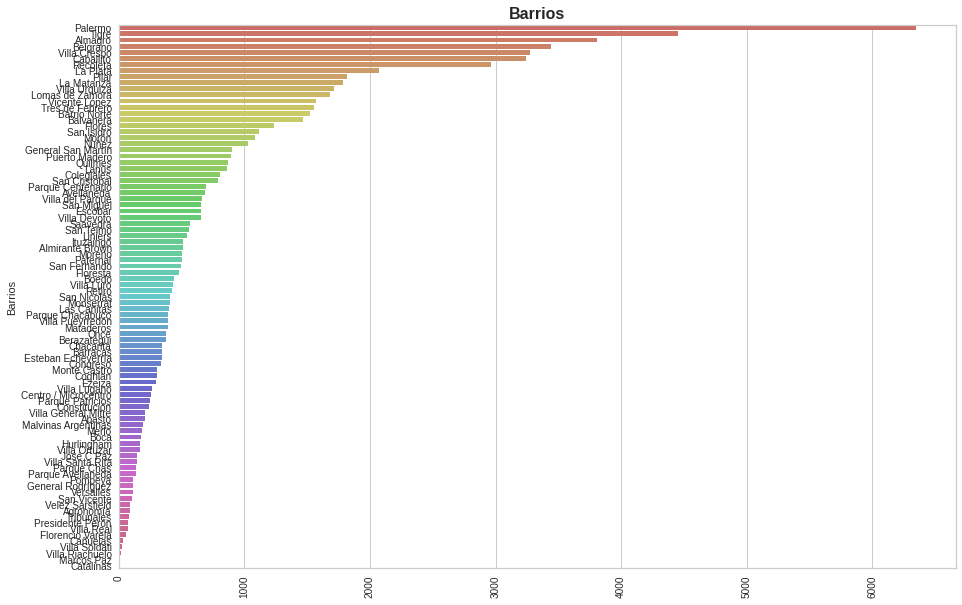

In [ ]:
#-----> Distribución de la variable l3
fig= plt.figure(figsize=(15,10))
fig.tight_layout()
sns.countplot(y = "l3", data = dataproperati_copia_4,order= sample_dataproperati_copia_4['l3'].value_counts().index, palette = "hls",saturation=0.75) 
plt.title('Barrios',fontsize=16, weight="bold") 

plt.ylabel('Barrios')
plt.xlabel('')
plt.xticks(rotation = 90)
plt.show

Y chequeo la correlación entre ambas. En caso de que sean correlativas, lo mejor será eliminar l3 dado que, por una parte, a la hora de codificarla (volverla numerica) agrega costo (agregaría 89 columnas al DF) siendo que la información que brida está en l2

****Creo una tabla de contingencia que cruce los datos de l2 y l3****

Una tabla de contingencia (o tabla de referencias cruzadas) se utiliza para conocer la relación entre variables categóricas

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contingencia_df= pd.crosstab(dataproperati_copia_4['l2'], dataproperati_copia_4['l3']) 
contingencia_df

l3,Abasto,Agronomía,Almagro,Almirante Brown,Avellaneda,Balvanera,Barracas,Barrio Norte,Belgrano,Berazategui,Boca,Boedo,Caballito,Catalinas,Cañuelas,Centro / Microcentro,Chacarita,Coghlan,Colegiales,Congreso,Constitución,Escobar,Esteban Echeverría,Ezeiza,Florencio Varela,Flores,Floresta,General Rodríguez,General San Martín,Hurlingham,Ituzaingó,José C Paz,La Matanza,La Plata,Lanús,Las Cañitas,Liniers,Lomas de Zamora,Malvinas Argentinas,Marcos Paz,...,Parque Avellaneda,Parque Centenario,Parque Chacabuco,Parque Chas,Parque Patricios,Paternal,Pilar,Pompeya,Presidente Perón,Puerto Madero,Quilmes,Recoleta,Retiro,Saavedra,San Cristobal,San Fernando,San Isidro,San Miguel,San Nicolás,San Telmo,San Vicente,Tigre,Tres de Febrero,Tribunales,Velez Sarsfield,Versalles,Vicente López,Villa Crespo,Villa Devoto,Villa General Mitre,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
l2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bs.As. G.B.A. Zona Norte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1317,0,0,0,0,0,0,1744,0,0,277,0,0,0,0,0,0,348,0,...,0,0,0,0,0,0,3560,0,0,0,0,0,0,0,0,987,2225,1427,0,0,0,8636,0,0,0,0,3176,0,0,0,0,0,0,0,0,0,0,0,0,0
Bs.As. G.B.A. Zona Oeste,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,221,0,321,1030,0,3669,0,0,0,0,0,0,27,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bs.As. G.B.A. Zona Sur,0,0,0,1034,1350,0,0,0,0,672,0,0,0,0,76,0,0,0,0,0,0,0,641,597,134,0,0,0,0,0,0,0,0,4247,1739,0,0,3160,0,0,...,0,0,0,0,0,0,0,0,147,0,1807,0,0,0,0,0,0,0,0,0,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Capital Federal,462,164,7498,0,0,2941,749,3198,6876,0,335,915,6610,5,0,504,743,586,1582,671,472,0,0,0,0,2535,935,0,0,0,0,0,0,0,0,788,1042,0,0,0,...,261,1315,822,288,479,1040,0,222,0,1746,0,5869,819,1110,1520,0,0,0,810,1024,0,0,0,165,187,241,0,6429,1416,422,507,926,330,714,142,41,347,69,3325,1346


Hipótesis: 
Primero se definen las hipotesis: La hipótesis nula( H0 ) establece que no existe relación entre las variables. Una hipótesis alternativa (H1) afirmaría que existe una relación significativa entre los dos. Métodos: p-value y Chi-cuadrado.

La función chi2_contingency() toma como entrada la tabla de contingencia. Devuelve una tupla que contiene estadísticas de prueba , el valor p , los grados de libertad y la tabla esperada (la que creamos a partir de los valores calculados) en ese orden. 

Por lo tanto, tenemos que comparar la obtenida p-valor con valor alfa de 0,05.

Dependiendo de si el valor p es mayor o menor que alfa las variables serán o no dependientes.

In [ ]:
# Chi-square test of independence. 

c, p, dof, expected = chi2_contingency(contingencia_df)
alpha = 0.05

print("p-value es " + str(p)) 

if p <= alpha: 
    print('Ambas variables correlacionan o son dependientes (rechaza H0)') 
else: 
    print('Las variables no son dependientes o no correlacionan (acepta H0)')

p-value es 0.0
Ambas variables correlacionan o son dependientes (rechaza H0)


Dado que correlaciona, elimino una de las variables

De esta manera, se reduce el costo teniendo en cuenta que a la hora de volver L3 a dummies estaría agregado 89 columnas


In [88]:
dataproperati_copia_4.drop(['l3'], axis=1, inplace=True)

In [89]:
#Lista de variables numéricas y categoricas
var_numericas = dataproperati_copia_4.select_dtypes(include="number").columns.tolist()
var_categoricas = dataproperati_copia_4.select_dtypes(exclude="number").columns.tolist()

In [90]:
dataproperati_copia_4[var_categoricas].head()

,l2,property_type
0,Capital Federal,Departamento
1,Capital Federal,PH
2,Capital Federal,PH
3,Capital Federal,PH
5,Capital Federal,PH


In [91]:
#codifico las var categoricas
dataproperati_copia_4 = pd.get_dummies(data=dataproperati_copia_4,columns=var_categoricas)


Ahora sí, codifico las variables categóricas

In [92]:
dataproperati_copia_4.shape

(143145, 13)

Realizado el preprocesamiento, vuelvo  a entrenar el modelo implementado en el proyecto 1


Hago el train test split

In [93]:
#divido el ds en entrenamiento y  prueba ds total.

price = dataproperati_copia_4["price"] # y o variable target
dataprop = dataproperati_copia_4.drop("price", axis=1)

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(dataprop, price,
                                                    test_size=0.3, random_state=42) #donde dataproperati sería X y price sería y
print(dataprop.shape, price.shape) 
print('X_train: ', X_train_df.shape, ' -   X_test: ', X_test_df.shape, ' -   y_train: ', y_train_df.shape, ' -   y_test: ', y_test_df.shape)

(143145, 12) (143145,)
X_train:  (100201, 12)  -   X_test:  (42944, 12)  -   y_train:  (100201,)  -   y_test:  (42944,)


***Entreno los modelos (Árbol de decisión y knn) propuestos en el sprint project 1.*** 


importo lo necesario

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error
 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

In [ ]:
#instancio modelos
ad_regresion = DecisionTreeRegressor(max_depth=6, random_state=42)
knn_regresion = KNeighborsRegressor(n_neighbors=9) 

In [ ]:
#aplico a dataset total
ad_regresion.fit(X_train_df, y_train_df)
knn_regresion.fit(X_train_df, y_train_df)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [ ]:
#predición sobre los datos de testeo total
y_pred_ad_df = ad_regresion.predict(X_test_df)
y_pred_knn_df=knn_regresion.predict(X_test_df)

In [ ]:
#Aplico los modelos del SP1  - total
modelo_df = [ 'Árbol de Decisión','Vecinos más cercanos']

for i, model in enumerate([ad_regresion,knn_regresion]):
    y_train_pred_df = model.predict(X_train_df)
    y_test_pred_df = model.predict(X_test_df)
    
    
    print(f'\nModelo: {modelo_df[i]}\n')

    #rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    #rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    #rmse_train =(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_train = np.sqrt(mean_squared_error(y_train_df, y_train_pred_df))
    #rmse_test =(mean_squared_error(y_test, y_test_pred, squared=False))
    rmse_test = np.sqrt(mean_squared_error(y_test_df, y_test_pred_df))
    mae_train=mean_absolute_error(y_train_df, y_train_pred_df)
    mae_test= mean_absolute_error(y_test_df, y_test_pred_df)
    mse_train=mean_squared_error(y_train_df, y_train_pred_df)
    mse_test=mean_squared_error(y_test_df, y_test_pred_df)
    r2_train= r2_score(y_train_df, y_train_pred_df)
    r2_test= r2_score(y_test_df, y_test_pred_df)
    #mape_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
    #mape_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
    print('Raíz del error cuadrático medio en Train (RMSE): ',rmse_train)
    print('Raíz del error cuadrático medio en Test (RMSE):',rmse_test)
    print('Media del Error absoluto en Train (MAE): ',mae_train)
    print('Media del Error absoluto en test: (MAE) ',mae_test)
    print('Error cuadrático medio en train (MSE): ',mse_train)
    print('Error cuadrático medio en test (MSE): ',mse_test)
    print('R2 en train (MSE): ',r2_train)
    print('R2 en test (MSE): ',r2_test)
    #print('Porcentaje de error absoluto medio en train (MAPE): ', mape_train)
    #print('Porcentaje de error absoluto medio en test (MAPE): ', mape_test)  


Modelo: Árbol de Decisión

Raíz del error cuadrático medio en Train (RMSE):  220821.92396564162
Raíz del error cuadrático medio en Test (RMSE): 187753.21047161784
Media del Error absoluto en Train (MAE):  81624.12157790412
Media del Error absoluto en test: (MAE)  82031.0924239919
Error cuadrático medio en train (MSE):  48762322103.8876
Error cuadrático medio en test (MSE):  35251268042.39963
R2 en train (MSE):  0.43530758647713863
R2 en test (MSE):  0.5311247048083363

Modelo: Vecinos más cercanos

Raíz del error cuadrático medio en Train (RMSE):  196785.3445241386
Raíz del error cuadrático medio en Test (RMSE): 176730.1358916516
Media del Error absoluto en Train (MAE):  63579.93061058384
Media del Error absoluto en test: (MAE)  69367.59594148451
Error cuadrático medio en train (MSE):  38724471819.483925
Error cuadrático medio en test (MSE):  31233540932.28164
R2 en train (MSE):  0.5515509821793532
R2 en test (MSE):  0.5845642855488165


Las métricas de error en comparación con las metricas del modelo con los datos ingresados del proy 1 son mayores, es decir, el modelo no es mejor. 
La diferencia entre este y aquel es que incluye los datos de todas las regiones y no sólo de CABA. Podría deberse a que la diferencia en esos datos hace que el modelo aprenda peor.

--------------------------------------------------------------------------------

Probamos correr el modelo con la opción de VA eliminados (otro tratamiento)

In [48]:
#total
dataproperati_copia_5 = dataproperati_copia_2.copy()
#recordemos que el dataproperati_copia_2 es aquel cuyos VA fueron eliminados

In [87]:
#escalo var num ds total
scaler_2_df = RobustScaler().fit(dataproperati_copia_5[var_numericas])
dataproperati_copia_5.loc[:, var_numericas] = scaler_2_df.transform(dataproperati_copia_5[var_numericas])

In [88]:
#elimino l3 e ds total
dataproperati_copia_5.drop(['l3'], axis=1, inplace=True)

In [89]:
#chequeo Lista de variables numéricas y categoricas en ds total
var_numericas = dataproperati_copia_5.select_dtypes(include="number").columns.tolist()
var_categoricas = dataproperati_copia_5.select_dtypes(exclude="number").columns.tolist()
#chequeo
dataproperati_copia_5[var_categoricas].head()

,l2,property_type
11,Capital Federal,Departamento
12,Capital Federal,Departamento
22,Capital Federal,Departamento
23,Capital Federal,Departamento
24,Capital Federal,Departamento


In [90]:
#codifico en DS total
dataproperati_copia_5 = pd.get_dummies(data=dataproperati_copia_5,columns=var_categoricas)

In [91]:
#chequeo
dataproperati_copia_5.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,property_type_Casa,property_type_Departamento,property_type_PH
11,-0.50,-1.00,0.00,-0.04,-0.05,149000.00,0,0,0,1,0,1,0
12,-0.50,-1.00,0.00,-0.36,-0.39,115000.00,0,0,0,1,0,1,0
22,-0.50,-1.00,0.00,-0.45,-0.36,95000.00,0,0,0,1,0,1,0
23,-0.50,-1.00,0.00,-0.45,-0.36,95000.00,0,0,0,1,0,1,0
24,-0.50,-1.00,0.00,-0.22,-0.30,154000.00,0,0,0,1,0,1,0


In [92]:
#y hago el tts en ds total
#divido el ds en entrenamiento y  prueba.

price_2 = dataproperati_copia_5["price"] # y o variable target
dataprop_2 = dataproperati_copia_5.drop("price", axis=1)

X_train_2_df, X_test_2_df, y_train_2_df, y_test_2_df = train_test_split(dataprop_2, price_2,
                                                    test_size=0.3, random_state=42) #donde dataproperati sería X y price sería y
print(dataprop_2.shape, price_2.shape) 
print('X_train_2: ', X_train_2_df.shape, ' -   X_test_2: ', X_test_2_df.shape, ' -   y_train_2: ', y_train_2_df.shape, ' -   y_test_2: ', y_test_2_df.shape)

(108939, 12) (108939,)
X_train_2:  (76257, 12)  -   X_test_2:  (32682, 12)  -   y_train_2:  (76257,)  -   y_test_2:  (32682,)


In [ ]:
ad_regresion_2 = DecisionTreeRegressor(max_depth=6, random_state=42)
knn_regresion_2 = KNeighborsRegressor(n_neighbors=9) 

In [ ]:
#y vuelvo a correr los modelos del anterior proyecto en ds total

ad_regresion_2.fit(X_train_2_df, y_train_2_df)
knn_regresion_2.fit(X_train_2_df, y_train_2_df)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [ ]:
#predición sobre los datos de testeo en total
y_pred_ad_2_df = ad_regresion_2.predict(X_test_2_df)
y_pred_knn_2_df=knn_regresion_2.predict(X_test_2_df)

In [ ]:
#Aplico modelos del sp1 a DS total
modelo = [ 'Árbol de Decisión 2','Vecinos más cercanos 2']

for i, model in enumerate([ad_regresion_2,knn_regresion_2]):
    y_train_pred_2_df = model.predict(X_train_2_df)
    y_test_pred_2_df= model.predict(X_test_2_df)
    
    
    print(f'\nModelo: {modelo[i]}\n')

    #rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    #rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    #rmse_train =(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_train_2 = np.sqrt(mean_squared_error(y_train_2_df, y_train_pred_2_df))
    #rmse_test =(mean_squared_error(y_test, y_test_pred, squared=False))
    rmse_test_2 = np.sqrt(mean_squared_error(y_test_2_df, y_test_pred_2_df))
    mae_train_2=mean_absolute_error(y_train_2_df, y_train_pred_2_df)
    mae_test_2= mean_absolute_error(y_test_2_df, y_test_pred_2_df)
    mse_train_2=mean_squared_error(y_train_2_df, y_train_pred_2_df)
    mse_test_2=mean_squared_error(y_test_2_df, y_test_pred_2_df)
    r2_train_2= r2_score(y_train_2_df, y_train_pred_2_df)
    r2_test_2= r2_score(y_test_2_df, y_test_pred_2_df)
    #mape_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
    #mape_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
    print('Raíz del error cuadrático medio en Train (RMSE): ',rmse_train_2)
    print('Raíz del error cuadrático medio en Test (RMSE):',rmse_test_2)
    print('Media del Error absoluto en Train (MAE): ',mae_train_2)
    print('Media del Error absoluto en test: (MAE) ',mae_test_2)
    print('Error cuadrático medio en train (MSE): ',mse_train_2)
    print('Error cuadrático medio en test (MSE): ',mse_test_2)
    print('R2 en train (MSE): ',r2_train_2)
    print('R2 en test (MSE): ',r2_test_2)
    #print('Porcentaje de error absoluto medio en train (MAPE): ', mape_train)
    #print('Porcentaje de error absoluto medio en test (MAPE): ', mape_test)


Modelo: Árbol de Decisión 2

Raíz del error cuadrático medio en Train (RMSE):  0.6620909353370876
Raíz del error cuadrático medio en Test (RMSE): 0.9261975585290849
Media del Error absoluto en Train (MAE):  0.3917444756595345
Media del Error absoluto en test: (MAE)  0.3995125180879632
Error cuadrático medio en train (MSE):  0.43836440665553955
Error cuadrático medio en test (MSE):  0.8578419174252376
R2 en train (MSE):  0.7552926712698353
R2 en test (MSE):  0.39548277883379435

Modelo: Vecinos más cercanos 2

Raíz del error cuadrático medio en Train (RMSE):  0.936100996285098
Raíz del error cuadrático medio en Test (RMSE): 0.8617488142135518
Media del Error absoluto en Train (MAE):  0.29705720191488105
Media del Error absoluto en test: (MAE)  0.32600270137091436
Error cuadrático medio en train (MSE):  0.8762850752459531
Error cuadrático medio en test (MSE):  0.7426110187984625
R2 en train (MSE):  0.5108330495955453
R2 en test (MSE):  0.47668545873945867


Con este dataset, con los Va eliminados, tenemos metricas mejores.
La diferencia entre este DS con datos preprocesados es que incluye las variables categóricas (en el SP1 no), y toma todas las zonas, no sólo CABA.
Sin embargo, las metricas del modelo generado en el proyecto 1 siguen siendo mejores. 

**conclusiones primera parte:** 

Comparando las métricas de error de los modelos realizados en el sprint 1 comparados con su desempeño con los datos preprocesados (imputación de datos NaN, eliminación de datos atípicos, escalado y encoding), el resultado arrojado indica que el modelo del proyecto anerior se ajusta mejor:
Arbol de decisión proy 1:

R2 en train:  0.7141215905455658

R2 en test: 0.6983263127587327

Arbol de decisión proy 2:

R2 en train:  0.7552926712698353

R2 en test:  0.39548277883379435

KNN proy 1: 

R2 en train:  0.7812526359881624

R2 en test: 0.7196181534390923

KNN proy 2:

R2 en train (MSE):  0.5108330495955453

R2 en test (MSE):  0.47668545873945867

En ambos modelos vemos menor error en train (en arbol de decisión del proy 2 es levemente menor) y en el mod del proyecto 1, menor sobreajuste según el error en test (error de varianza).
Esto podría deberse a la complejidad del modelo. Por otra parte, los datos tomados estaban sesgados mucho más específicamente: sólo CABA, lo que deja afuera una gran cantidad de datos que en ese caso quedaron sin tomar, condicion de mayor homogeneidad..
Quizá utilizar reducción de dimensionalidad arroje mejores metricas.

--------------------------------------------------------------------------------

**Modelos Avanzados**

Se eligieron cuatro medelos: RandomForest, Knn Regressor, XGBoost y Baggin regressor. De todos ellos se analizó la distribución de errores y su desempeño con optimización de hiperparámetros con GridSearchCV. 

De dos de ellos, RandomForest y XGboost, se comparó ese desempeño con el del modelo con sus argumentos por default y se analizó la importancia de cada atributo y algunos árboles al azar en el modelo RandomForest.


--------------------------------------------------------------------------------

En primera instancia, con GridSearchCV encontramos los mejores hiperparámetros. Luego comparamo los desempeños de los modelos con argumentos por defecto con aquellos con los mejores hp

In [93]:
from sklearn.pipeline import Pipeline
import math

***Random Forest***

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_forest = RandomForestRegressor(random_state = 42)#rf c argumentos por defecto
params = {"n_estimators": [100, 200, 300],"max_depth": [3, 5, 7, 9, 11, 15, 20],"max_features": ["log2", "sqrt"], "oob_score": [True, False], "random_state":[42]}
#params_rs = {"n_estimators": [100, 150, 200, 250, 300, 350, 400, 450],"max_depth": [3, 5, 7, 9, 11, 13, 15, 18, 20, 23, 26, 29, 31, 35, 40, 50],"max_features": ["log2", "sqrt"], "oob_score": [True, False], "random_state":[42]}

In [ ]:
#gridsearch
rf_cv = GridSearchCV(estimator=random_forest, param_grid=params,scoring="r2", cv=3).fit(X_train_2_df, y_train_2_df)#neg_median_absolute_error

In [ ]:
#randomsearch
#rf_cv_rs = RandomizedSearchCV(estimator = random_forest, param_distributions=params_rs, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1, scoring="r2" ).fit(X_train_2_df, y_train_2_df)#neg_median_absolute_error

In [ ]:
y_pred_rf_gridsearch = rf_cv.predict(X_test_2_df)

In [ ]:
#y_pred_rf_randomsearch = rf_cv_rs.predict(X_test_2_df)

In [ ]:
#print(f"El mejor MAPE es: {round(-1 * rf_cv.best_score_ * 100, 2)}%")
print(f"El mejor R2 es: {round(rf_cv.best_score_, 2)}")

print("Los mejores hiperparametros para RF son: ")
for key, value in rf_cv.best_params_.items():
    print(f"{key}: {value}")

El mejor R2 es: 0.55
Los mejores hiperparametros para RF son: 
max_depth: 20
max_features: log2
n_estimators: 100
oob_score: True
random_state: 42


In [ ]:
#RandomSearch
#print(f"El mejor MAPE es: {round(-1 * rf_cv.best_score_ * 100, 2)}%")
#print(f"El mejor R2 es: {round(rf_cv_rs.best_score_, 2)}")

#print("Los mejores hiperparametros son: ")
#for key, value in rf_cv_rs.best_params_.items():
 #   print(f"{key}: {value}")

El mejor R2 es: 0.52
Los mejores hiperparametros son: 
random_state: 42
oob_score: True
n_estimators: 200
max_features: log2
max_depth: 26


***KNN***

In [ ]:
params = {"n_neighbors": [3, 5, 7, 9, 15, 18, 20, 25, 30],"weights": ["distance"]}
knn = KNeighborsRegressor()

In [ ]:
knn_cv = GridSearchCV(estimator=knn, param_grid=params, scoring="r2", cv=5).fit(X_train_2_df, y_train_2_df)

In [ ]:
y_pred_knn = knn_cv.predict(X_test_2_df)

In [ ]:
print(f"El mejor R2 es: {round(knn_cv.best_score_ , 2)}")

print("Los mejores hiperparametros son: ")
for key, value in knn_cv.best_params_.items():
    print(f"{key}: {value}")

El mejor R2 es: 0.6
Los mejores hiperparametros son: 
n_neighbors: 30
weights: distance


***XGBoost***

In [95]:
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
Xgboost_modelo = xgb.XGBRegressor(verbosity=0) 

In [ ]:
params_xgb = { "n_estimators":[500,1000,1500, 2000],"learning_rate":[0.1],'max_depth': [500,1000, 1500]}

In [ ]:
 Xgboost_modelo_CV = GridSearchCV( estimator=Xgboost_modelo, param_grid=params_xgb, cv=5, scoring="r2") #neg_root_mean_squared_error

In [ ]:
Xgboost_modelo_CV.fit(X_train_2_df,y_train_2_df)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1], 'max_depth': [500, 1000, 1500],
                         'n_estimators': [500, 1000

In [ ]:
y_pred_Xgb = Xgboost_modelo_CV.predict(X_test_2_df)

In [ ]:
print(f"El mejor r2 es: {round( Xgboost_modelo_CV.best_score_ , 2)}")

print("Los mejores hiperparametros son: ")
for key, value in Xgboost_modelo_CV.best_params_.items():
    print(f"{key}: {value}")

El mejor r2 es: 0.58
Los mejores hiperparametros son: 
learning_rate: 0.1
max_depth: 500
n_estimators: 1000


***Bagging Regressor***

In [96]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
modelo_bagging = BaggingRegressor(random_state=42)
params_bagging={"n_estimators":[10, 20, 30, 40],"bootstrap":[True, False],"warm_start":[True, False]}

In [ ]:
modelo_bagging_CV = GridSearchCV(estimator=modelo_bagging, param_grid=params_bagging, cv=5, scoring="r2")#neg_mean_absolute_percentage_error

In [ ]:
modelo_bagging_CV.fit(X_train_2_df,y_train_2_df)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30, 40],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
print(f"El mejor r2 es: {round( modelo_bagging_CV.best_score_ , 2)}") #(-1 * modelo_bagging_CV.best_score_ * 100, 2)

print("Los mejores hiperparametros son: ")
for key, value in modelo_bagging_CV.best_params_.items():
    print(f"{key}: {value}")

El mejor r2 es: 0.59
Los mejores hiperparametros son: 
bootstrap: True
n_estimators: 30
warm_start: True


In [ ]:
y_pred_bag = modelo_bagging_CV.predict(X_test_2_df)


***interpretacion de modelos***

Una vez que hallamos los mejores HP, corremos los modelos con esa configuración y los comparamos con sus argumentos por defecto

*** 1. Random Forest ***

RF con argumentos por defecto

In [105]:
RF_default = RandomForestRegressor(random_state=42)
RF_default.fit(X_train_2_df,y_train_2_df)

y_train_pred_RF_default = RF_default.predict(X_train_2_df)
y_test_pred_RF_default = RF_default.predict(X_test_2_df)

rmse_train_RF_default = np.sqrt(mean_squared_error(y_train_2_df, y_train_pred_RF_default))
rmse_test_RF_default = np.sqrt(mean_squared_error(y_test_2_df, y_test_pred_RF_default))

r2_train_RF_default= r2_score(y_train_2_df, y_train_pred_RF_default)
r2_test_RF_default= r2_score(y_test_2_df, y_test_pred_RF_default)

print("RMSE en Train es:",rmse_train_RF_default)
print("RMSE en Test es:",rmse_test_RF_default)

print("R2 en Train es:",r2_train_RF_default)
print("R2 en Test es:",r2_test_RF_default)

RMSE en Train es: 70324.43885693922
RMSE en Test es: 85901.47364243184
R2 en Train es: 0.8584972438830913
R2 en Test es: 0.6059972867853152


RF con mejores parametros con Grid search

In [106]:
#final_RF = RandomForestRegressor(random_state=42,bootstrap=False, criterion= "r2", max_depth= 20, max_features= "log2", n_estimators= 300)
#final_RF.fit(X_train_2,y_train_2)

final_RF = RandomForestRegressor(random_state=42,bootstrap=False, max_depth= 20, max_features= "log2", n_estimators= 100)#oob_score= True
final_RF.fit(X_train_2_df,y_train_2_df)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [107]:
y_train_pred_RF = final_RF.predict(X_train_2_df)
y_test_pred_RF = final_RF.predict(X_test_2_df)

rmse_train_RF = np.sqrt(mean_squared_error(y_train_2_df, y_train_pred_RF))
rmse_test_RF = np.sqrt(mean_squared_error(y_test_2_df, y_test_pred_RF))

r2_train_RF= r2_score(y_train_2_df, y_train_pred_RF)
r2_test_RF= r2_score(y_test_2_df, y_test_pred_RF)

print("RMSE en Train es:",rmse_train_RF)
print("RMSE en Test es:",rmse_test_RF)

print("R2 en Train es:",r2_train_RF)
print("R2 en Test es:",r2_test_RF)

RMSE en Train es: 49861.62840380569
RMSE en Test es: 81834.17520835824
R2 en Train es: 0.9288646842526872
R2 en Test es: 0.6424247892764796


***important features Random Forest***

In [ ]:
final_RF.feature_importances_

array([0.11267921, 0.05734536, 0.3758011 , 0.18814505, 0.20759735,
       0.00421838, 0.01331647, 0.00324598, 0.01425511, 0.00316884,
       0.01251029, 0.00771686])

In [ ]:
X_train_2_df.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'l2_Bs.As. G.B.A. Zona Norte', 'l2_Bs.As. G.B.A. Zona Oeste',
       'l2_Bs.As. G.B.A. Zona Sur', 'l2_Capital Federal', 'property_type_Casa',
       'property_type_Departamento', 'property_type_PH'],
      dtype='object')

rooms: 0.11267921342275863
bedrooms: 0.057345357933111074
bathrooms: 0.375801097366896
surface_total: 0.1881450529032473
surface_covered: 0.20759735236130505
l2_Bs.As. G.B.A. Zona Norte: 0.004218383043569869
l2_Bs.As. G.B.A. Zona Oeste: 0.013316468436098001
l2_Bs.As. G.B.A. Zona Sur: 0.0032459778036101118
l2_Capital Federal: 0.014255108842191671
property_type_Casa: 0.003168840449071986
property_type_Departamento: 0.01251028631454117
property_type_PH: 0.007716861123599205

 ---------------------------------------------------------------------- 



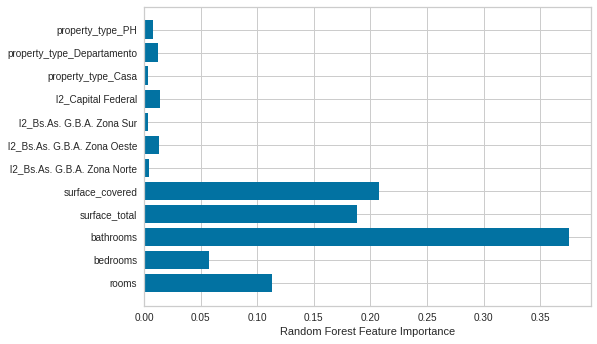

In [ ]:
importance = final_RF.feature_importances_
# lista de columnas importantes
for name, importance in zip(X_train_2_df.columns, final_RF.feature_importances_): 
    print(name + ': ' + str(importance))
print('\n','----------------------------------------------------------------------','\n')    
# plot feature importance
plt.barh(X_train_2_df.columns, final_RF.feature_importances_)
plt.xlabel("Random Forest Feature Importance")
plt.show()



In [ ]:
#plt.barh(X_train_3.columns, final_RF.feature_importances_)
#plt.xlabel("Random Forest Feature Importance")

Chequeo con arboles en particular

rooms: 0.44287163902687554
bedrooms: 0.01318237074166104
bathrooms: 0.07593439406714479
surface_total: 0.2630950887283794
surface_covered: 0.13561463608994126
l2_Bs.As. G.B.A. Zona Norte: 0.0029688210514392274
l2_Bs.As. G.B.A. Zona Oeste: 0.01783356879142579
l2_Bs.As. G.B.A. Zona Sur: 0.006787130761148306
l2_Capital Federal: 0.007292718570775877
property_type_Casa: 0.00465364843762559
property_type_Departamento: 0.02282640166922782
property_type_PH: 0.006939582064355321

 ---------------------------------------------------------------------- 



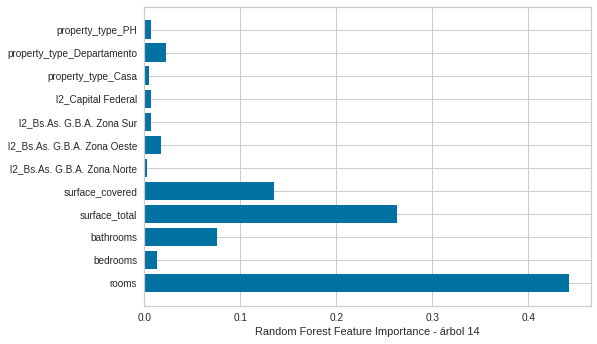

rooms: 0.020041987200171328
bedrooms: 0.012611896215943483
bathrooms: 0.2422945072282092
surface_total: 0.5686544485208969
surface_covered: 0.11537697222510547
l2_Bs.As. G.B.A. Zona Norte: 0.004478470666924156
l2_Bs.As. G.B.A. Zona Oeste: 0.01224093802197382
l2_Bs.As. G.B.A. Zona Sur: 0.0041613121482922755
l2_Capital Federal: 0.01052082545056736
property_type_Casa: 0.0032421730616332234
property_type_Departamento: 0.0034946918108210677
property_type_PH: 0.002881777449461845

 ---------------------------------------------------------------------- 



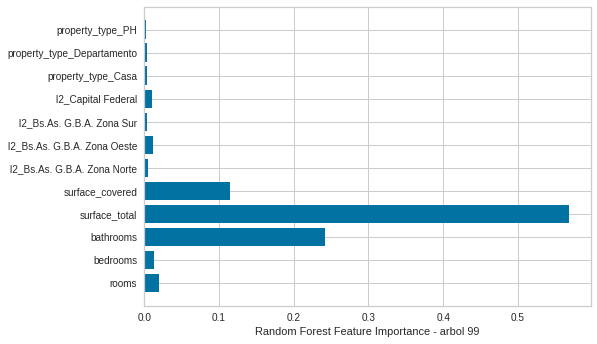

rooms: 0.03286297395810182
bedrooms: 0.014136395978885281
bathrooms: 0.503765520314365
surface_total: 0.08619890110903566
surface_covered: 0.3093696097609516
l2_Bs.As. G.B.A. Zona Norte: 0.0019446039960310728
l2_Bs.As. G.B.A. Zona Oeste: 0.0044298283343908364
l2_Bs.As. G.B.A. Zona Sur: 0.001601674399449582
l2_Capital Federal: 0.023205029955841033
property_type_Casa: 0.0003547770039251214
property_type_Departamento: 0.00957351937856001
property_type_PH: 0.012557165810462923

 ---------------------------------------------------------------------- 



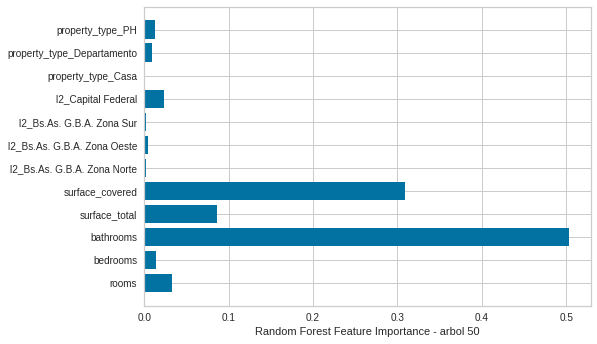

In [ ]:
arbol_14 = final_RF.estimators_[14]
importance14 = arbol_14.feature_importances_
# lista de columnas importantes
for name, importance14 in zip(X_train_2_df.columns, arbol_14.feature_importances_): 
    print(name + ': ' + str(importance14))
print('\n','----------------------------------------------------------------------','\n')    
# plot feature importance
plt.barh(X_train_2_df.columns, arbol_14.feature_importances_)
plt.xlabel("Random Forest Feature Importance - árbol 14")
plt.show()

arbol_99 = final_RF.estimators_[99]
importance99 = arbol_99.feature_importances_
# lista de columnas importantes
for name, importance99 in zip(X_train_2_df.columns, arbol_99.feature_importances_): 
    print(name + ': ' + str(importance99))
print('\n','----------------------------------------------------------------------','\n')    
# plot feature importance
plt.barh(X_train_2_df.columns, arbol_99.feature_importances_)
plt.xlabel("Random Forest Feature Importance - arbol 99")
plt.show()

arbol_50 = final_RF.estimators_[50]
importance50 = arbol_50.feature_importances_
# lista de columnas importantes
for name, importance50 in zip(X_train_2_df.columns, arbol_50.feature_importances_): 
    print(name + ': ' + str(importance50))
print('\n','----------------------------------------------------------------------','\n')    
# plot feature importance
plt.barh(X_train_2_df.columns, arbol_50.feature_importances_)
plt.xlabel("Random Forest Feature Importance - arbol 50")
plt.show()

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train_2_df


In [ ]:
y_train_pred_RF = final_RF.predict(X_train_2_df)

In [ ]:
y_train = y_train.flatten() #y_train_2_df = y_train_2_df.values.flatten()
prediccion_train = final_RF.predict(X_train_2_df) #prediccion_train = final_RF.predict(exog = y_train_2_df)
residuos_train = (prediccion_train) - (y_train)

In [ ]:
import statsmodels.api as sm

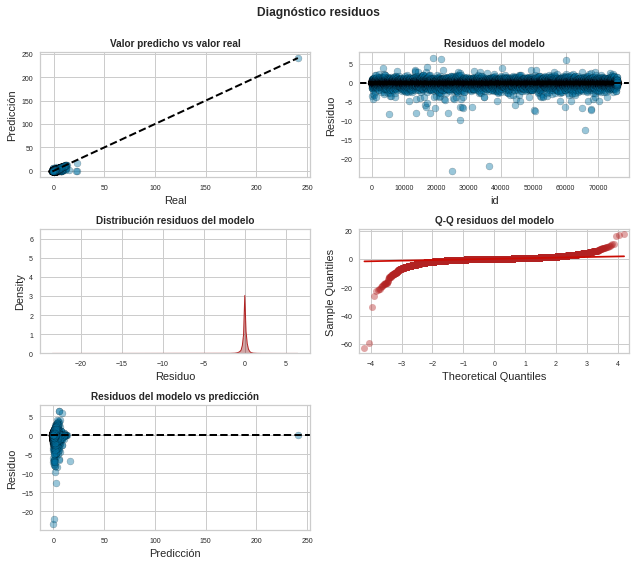

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train_2_df, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train_2_df.min(), y_train_2_df.max()], [y_train_2_df.min(), y_train_2_df.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train_2_df))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Test de normalidad

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. 


En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al alpha seleccionado (0.01), no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [ ]:
from scipy import stats

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test_rf = stats.shapiro(residuos_train)
shapiro_test_rf

print('Estadístico: ',shapiro_test.statistic_rf)
print('P-value: ', shapiro_test.pvalue_rf

(0.6640733480453491, 0.0)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 119788.64519614037, p-value = 0.0


In [ ]:
alpha = 0.01

print("p-value es " + str(p_value)) 
#Si el p-value es mayor al alpha seleccionado, se acepta H1
if p_value >= alpha: 
    print('se acepta H0 = La distribucion es normal') 
else: 
    print('se rechaza H0 = La distribución no es normal')

p-value es 0.0
se rechaza H0 = La distribución no es normal


Ambos test rechazan  la hipótesis de que los datos no se distribuyen de forma normal (H0) (p-value < 0.01).

In [ ]:
from yellowbrick.regressor import ResidualsPlot, PredictionError


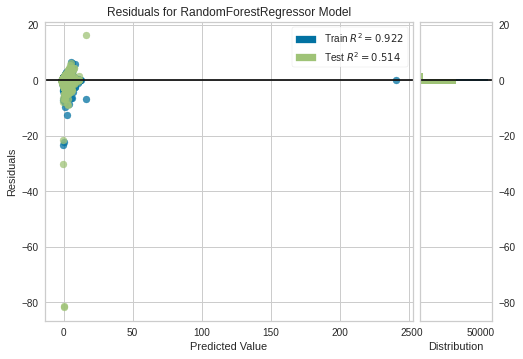

In [ ]:
residuals = ResidualsPlot(estimator=final_RF).fit(X_train_2_df, y_train_2_df)
residuals.score(X_test_2_df, y_test_2_df)
residuals.show()

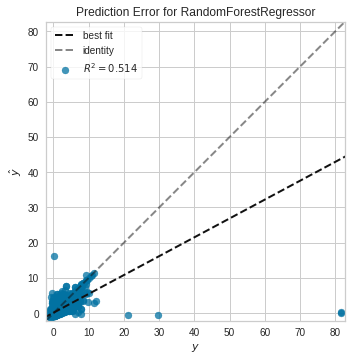

In [ ]:
predictions_error = PredictionError(estimator=final_RF).fit(X_train_2_df, y_train_2_df)
predictions_error.score(X_test_2_df, y_test_2_df)
predictions_error.show()

***Mejor modelo KNN ***

In [ ]:
final_KNN = KNeighborsRegressor(n_neighbors=30, weights= "distance")
final_KNN.fit(X_train_2_df,y_train_2_df)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='distance')

In [ ]:
y_train_pred_KNN = final_KNN.predict(X_train_2_df)
y_test_pred_KNN = final_KNN.predict(X_test_2_df)

rmse_train_KNN = np.sqrt(mean_squared_error(y_train_2_df, y_train_pred_KNN))
rmse_test_KNN = np.sqrt(mean_squared_error(y_test_2_df, y_test_pred_KNN))

r2_train_KNN= r2_score(y_train_2_df, y_train_pred_KNN)
r2_test_KNN= r2_score(y_test_2_df, y_test_pred_KNN)

print("RMSE en Train es:",rmse_train_KNN)
print("RMSE en Test es:",rmse_test_KNN)
print("R2 en Train es:",r2_train_KNN)
print("R2 en Test es:",r2_test_KNN)

RMSE en Train es: 0.354074257031388
RMSE en Test es: 0.8328015316063678
R2 en Train es: 0.9300157363862572
R2 en Test es: 0.511252618046472


In [ ]:
residuals_knn = ResidualsPlot(estimator=final_KNN).fit(X_train_2_df, y_train_2_df)
residuals_knn.score(X_test_2_df, y_test_2_df)
residuals_knn.show()

In [ ]:
predictions_error_knn = PredictionError(estimator=final_KNN).fit(X_train_2_df, y_train_2_df)
predictions_error_knn.score(X_test_2_df, y_test_2_df)
predictions_error_knn.show()

In [ ]:
'''
importance_KNN = final_KNN.feature_importances_
# lista de columnas importantes
for name, importance_KNN in zip(X_train_2_df.columns, final_KNN.feature_importances_): 
    print(name + ': ' + str(importance_KNN))
print('\n','----------------------------------------------------------------------','\n')    
# plot feature importance
plt.barh(X_train_2_df.columns, final_KNN.feature_importances_)
plt.xlabel("KNN Feature Importance")
plt.show()
'''

'\nimportance_KNN = final_KNN.feature_importances_\n# lista de columnas importantes\nfor name, importance_KNN in zip(X_train_2_df.columns, final_KNN.feature_importances_): \n    print(name + \': \' + str(importance_KNN))\nprint(\'\n\',\'----------------------------------------------------------------------\',\'\n\')    \n# plot feature importance\nplt.barh(X_train_2_df.columns, final_KNN.feature_importances_)\nplt.xlabel("KNN Feature Importance")\nplt.show()\n'

Distribución del error

In [ ]:

y_train_pred_KNN = final_KNN.predict(X_train_2_df)
y_train_knn = y_train_2_df

y_train_knn = y_train_knn.flatten() #y_train_2_df = y_train_2_df.values.flatten()
prediccion_train_knn = final_RF.predict(X_train_2_df) #prediccion_train = final_RF.predict(exog = y_train_2_df)
residuos_train_knn = (prediccion_train_knn) - (y_train_knn)

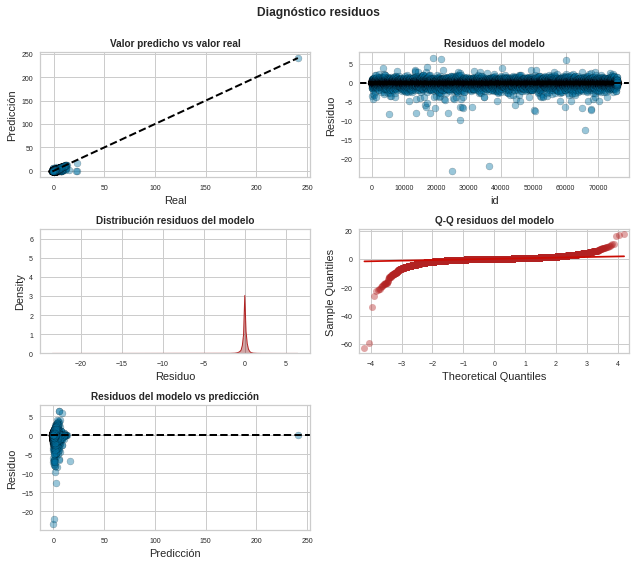

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train_2_df, prediccion_train_knn, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train_knn.min(), y_train_2_df.max()], [y_train_knn.min(), y_train_knn.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train_2_df))), residuos_train_knn,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train_knn,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train_knn,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train_knn, residuos_train_knn,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Test de normalidad

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. 


En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al alpha seleccionado (0.01), no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train_knn)
shapiro_test

shapiro_test.statistic
shapiro_test.pvalue

(0.6640733480453491, 0.0)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train_knn)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 119788.64519614037, p-value = 0.0


In [ ]:
alpha = 0.01

print("p-value es " + str(p_value)) 
#Si el p-value es mayor al alpha seleccionado, se acepta H1
if p_value >= alpha: 
    print('se acepta H0 = La distribucion es normal') 
else: 
    print('se rechaza H0 = La distribución no es normal')

p-value es 0.0
se rechaza H0 = La distribución no es normal


***Mejor modelo XGBoost - important features XGBoost***

XGboost con argumentos por defecto

In [108]:
Xgboost_default = xgb.XGBRegressor(random_state = 42)
Xgboost_default.fit(X_train_2_df,y_train_2_df)

y_train_pred_xgb_default = Xgboost_default.predict(X_train_2_df)
y_test_pred_xgb_default = Xgboost_default.predict(X_test_2_df)

rmse_train_xgb_default = np.sqrt(mean_squared_error(y_train_2_df, y_train_pred_xgb_default))
rmse_test_xgb_default = np.sqrt(mean_squared_error(y_test_2_df, y_test_pred_xgb_default))

r2_train_xgb_default= r2_score(y_train_2_df, y_train_pred_xgb_default)
r2_test_xgb_default= r2_score(y_test_2_df, y_test_pred_xgb_default)

print("RMSE en Train es:",rmse_train_xgb_default)
print("RMSE en Test es:",rmse_test_xgb_default)
print("R2 en Train es:",r2_train_xgb_default)
print("R2 en Test es:",r2_test_xgb_default)

[18:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE en Train es: 101279.12895625934
RMSE en Test es: 87502.20964074449
R2 en Train es: 0.7065107062818022
R2 en Test es: 0.5911763377490087


XGboost con mejores argumentos con gridsearch

In [109]:
final_Xgboost = xgb.XGBRegressor(verbosity=0, learning_rate= 0.1, max_depth= 500, n_estimators= 1000) 
final_Xgboost.fit(X_train_2_df,y_train_2_df)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=500, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [110]:
y_train_pred_xgb = final_Xgboost.predict(X_train_2_df)
y_test_pred_xgb = final_Xgboost.predict(X_test_2_df)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train_2_df, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test_2_df, y_test_pred_xgb))

r2_train_xgb= r2_score(y_train_2_df, y_train_pred_xgb)
r2_test_xgb= r2_score(y_test_2_df, y_test_pred_xgb)

print("RMSE en Train es:",rmse_train_xgb)
print("RMSE en Test es:",rmse_test_xgb)
print("R2 en Train es:",r2_train_xgb)
print("R2 en Test es:",r2_test_xgb)

RMSE en Train es: 46840.582550426465
RMSE en Test es: 79950.40166084094
R2 en Train es: 0.9372235253384703
R2 en Test es: 0.6586976458094701


rooms: 0.08665202
bedrooms: 0.007717849
bathrooms: 0.08431148
surface_total: 0.004497118
surface_covered: 0.021367729
l2_Bs.As. G.B.A. Zona Norte: 0.011931174
l2_Bs.As. G.B.A. Zona Oeste: 0.07460802
l2_Bs.As. G.B.A. Zona Sur: 0.0035113003
l2_Capital Federal: 0.3057647
property_type_Casa: 0.008430266
property_type_Departamento: 0.14065127
property_type_PH: 0.2505571

 ---------------------------------------------------------------------- 



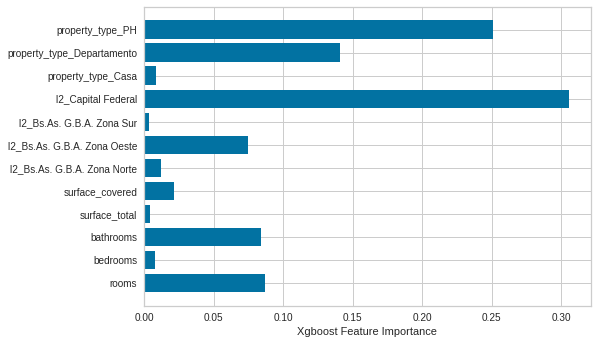

In [ ]:

importance_xgb = final_Xgboost.feature_importances_
# lista de columnas importantes
for name, importance_xgb in zip(X_train_2_df.columns, final_Xgboost.feature_importances_): 
    print(name + ': ' + str(importance_xgb))
print('\n','----------------------------------------------------------------------','\n')    
# plot feature importance
plt.barh(X_train_2_df.columns, final_Xgboost.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()


Distribución de errores

In [ ]:
y_train_pred_xgb = final_Xgboost.predict(X_train_2_df)
y_train_xgb = y_train_2_df

y_train_xgb = y_train_xgb.flatten() #y_train_2_df = y_train_2_df.values.flatten()
prediccion_train_xgb = final_RF.predict(X_train_2_df) #prediccion_train = final_RF.predict(exog = y_train_2_df)
residuos_train_xgb = (prediccion_train_xgb) - (y_train_xgb)


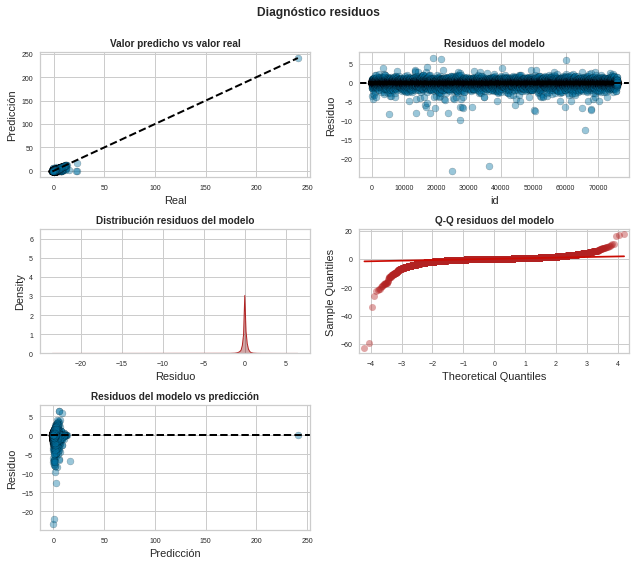

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train_xgb, prediccion_train_xgb, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train_xgb))), residuos_train_xgb,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train_xgb,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train_xgb,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train_xgb, residuos_train_xgb,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


Test de normalidad

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. 


En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al alpha seleccionado (0.01), no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test_xgb = stats.shapiro(residuos_train_xgb)
shapiro_test_xgb

shapiro_test_xgb.statistic
shapiro_test_xgb.pvalue

(0.6640733480453491, 0.0)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2_xgb, p_value_xgb = stats.normaltest(residuos_train_xgb)
print(f"Estadítico= {k2_xgb}, p-value = {p_value_xgb}")

Estadítico= 119788.64519614037, p-value = 0.0


In [ ]:
alpha = 0.01

print("p-value es " + str(p_value_xgb)) 
#Si el p-value es mayor al alpha seleccionado, se acepta H1
if p_value_xgb >= alpha: 
    print('se acepta H0 = La distribucion es normal') 
else: 
    print('se rechaza H0 = La distribución no es normal')

p-value es 0.0
se rechaza H0 = La distribución no es normal


--------------------------------------------------------------------------------

In [ ]:
residuals_gboost = ResidualsPlot(estimator=final_Xgboost).fit(X_train_2_df, y_train_2_df)
residuals_gboost.score(X_test_2_df, y_test_2_df)
residuals_gboost.show()

In [ ]:
predictions_error_gboost = PredictionError(estimator=final_Xgboost).fit(X_train_2_df, y_train_2_df)
predictions_error_gboost.score(X_test_2_df, y_test_2_df)
predictions_error_gboost.show()

**Mejor modelo Bagging **

Modelo con argumentos por defecto:

In [103]:
bagging_default = BaggingRegressor(random_state=42)
bagging_default.fit(X_train_2_df,y_train_2_df)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [104]:
y_train_pred_bagging_def = bagging_default.predict(X_train_2_df)
y_test_pred_bagging_def = bagging_default.predict(X_test_2_df)

rmse_train_bagging_def = np.sqrt(mean_squared_error(y_train_2_df, y_train_pred_bagging_def))
rmse_test_bagging_def = np.sqrt(mean_squared_error(y_test_2_df, y_test_pred_bagging_def))

r2_train_bagging_def= r2_score(y_train_2_df, y_train_pred_bagging_def)
r2_test_bagging_def= r2_score(y_test_2_df, y_test_pred_bagging_def)

print("RMSE en Train es:",rmse_train_bagging_def)
print("RMSE en Test es:",rmse_test_bagging_def)
print("R2 en Train es:",r2_train_bagging_def)
print("R2 en Test es:",r2_test_bagging_def)

RMSE en Train es: 72426.10601383385
RMSE en Test es: 95458.18290393014
R2 en Train es: 0.849913157881341
R2 en Test es: 0.5134535476756432


Modelo con mejores hp

In [111]:
final_bagging = BaggingRegressor(bootstrap = True, n_estimators= 30, warm_start= True, random_state=42)
final_bagging.fit(X_train_2_df,y_train_2_df)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=30,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=True)

In [112]:
y_train_pred_bagging = final_bagging.predict(X_train_2_df)
y_test_pred_bagging = final_bagging.predict(X_test_2_df)

rmse_train_bagging = np.sqrt(mean_squared_error(y_train_2_df, y_train_pred_bagging))
rmse_test_bagging = np.sqrt(mean_squared_error(y_test_2_df, y_test_pred_bagging))

r2_train_bagging= r2_score(y_train_2_df, y_train_pred_bagging)
r2_test_bagging= r2_score(y_test_2_df, y_test_pred_bagging)

print("RMSE en Train es:",rmse_train_bagging)
print("RMSE en Test es:",rmse_test_bagging)
print("R2 en Train es:",r2_train_bagging)
print("R2 en Test es:",r2_test_bagging)

RMSE en Train es: 72461.44040635771
RMSE en Test es: 89706.62726840556
R2 en Train es: 0.8497666769693609
R2 en Test es: 0.5703181182014792


In [ ]:

importance_bagging = final_bagging.feature_importances_
# lista de columnas importantes
for name, importance_bagging in zip(X_train_2_df.columns, final_bagging.feature_importances_): 
    print(name + ': ' + str(importance_bagging))
print('\n','----------------------------------------------------------------------','\n')    
#plot feature importance
plt.barh(X_train_2_df.columns, final_bagging.feature_importances_)
plt.xlabel("Bagging Feature Importance")
plt.show()

Distribucion de errores

In [ ]:
y_train_pred_bg = final_bagging.predict(X_train_2_df)
y_train_bg = y_train_2_df

y_train_bg = y_train_bg.flatten() #y_train_2_df = y_train_2_df.values.flatten()
prediccion_train_bg = final_bagging.predict(X_train_2_df) #prediccion_train = final_RF.predict(exog = y_train_2_df)
residuos_train_bg = (prediccion_train_bg) - (y_train_bg)

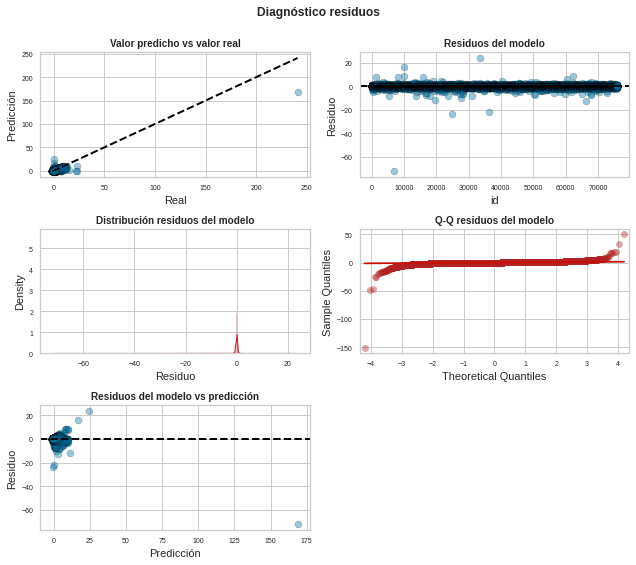

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train_bg, prediccion_train_bg, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train_bg.min(), y_train_bg.max()], [y_train_bg.min(), y_train_bg.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train_bg))), residuos_train_bg,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train_bg,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train_bg,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train_bg, residuos_train_bg,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Test de normalidad

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. 


En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al alpha seleccionado (0.01), no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test_bg = stats.shapiro(residuos_train_bg)
#shapiro_test_bg
shapiro_test_bg.statistic
shapiro_test_bg.pvalue

(0.4423002600669861, 0.0)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2_bg, p_value_bg = stats.normaltest(residuos_train_bg)
print(f"Estadítico= {k2_bg}, p-value = {p_value_bg}")

Estadítico= 235910.48783505434, p-value = 0.0


In [ ]:
alpha = 0.01

print("p-value es " + str(p_value_bg)) 
#Si el p-value es mayor al alpha seleccionado, se acepta H1
if p_value_bg >= alpha: 
    print('se acepta H0 = La distribucion es normal') 
else: 
    print('se rechaza H0 = La distribución no es normal')

p-value es 0.0
se rechaza H0 = La distribución no es normal


--------------------------------------------------------------------------------


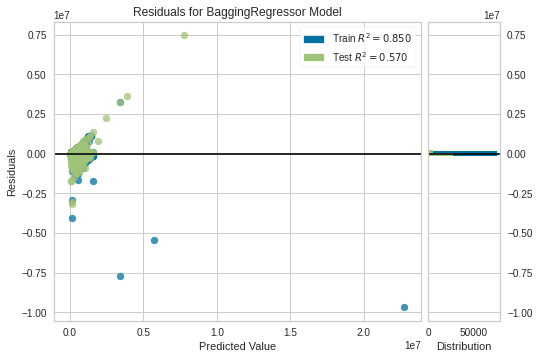

In [115]:
from yellowbrick.regressor import ResidualsPlot
residuals_bagging = ResidualsPlot(estimator=final_bagging).fit(X_train_2_df, y_train_2_df)
residuals_bagging.score(X_test_2_df, y_test_2_df)
residuals_bagging.show()

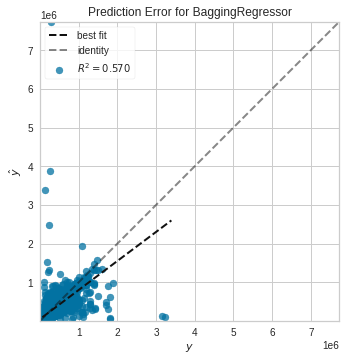

In [116]:
from yellowbrick.regressor import PredictionError
predictions_error_bagging = PredictionError(estimator=final_bagging).fit(X_train_2_df, y_train_2_df)
predictions_error_bagging.score(X_test_2_df, y_test_2_df)
predictions_error_bagging.show()

================================================================================


## Modelos Avanzados

Hasta aquí se desprende que las metricas de los modelos avanzados, de las cuatro elegidas en este punto son mejores que las arrojadas por los modelos KNN y Arbol de decisión implementados en el SP1. 

Tambien los cuatro modelos elegidos desempeñan mejor con los hiperparámetros elegidos a traves de GS que aquellos modelos con sus argumentos por defecto.

Para este punto tomaremos como referencia los modelos RandomFores y XGBoost
En ambos casos, las metricas de error indican que el desempeño de los modelos con los hiperparámetros elegidos mediante GridSearchCV son mejores que el desempeño de los mismos con sus argumentos por defecto.

###Random Forest argumentos por default:

RMSE en Train es: 70324.43885693922

RMSE en Test es: 85901.47364243184

R2 en Train es: 0.8584972438830913

R2 en Test es: 0.6059972867853152
    
###Random Forest mejores hp:

RMSE en Train es: 49861.62840380569

RMSE en Test es: 81834.17520835824

R2 en Train es: 0.9288646842526872

R2 en Test es: 0.6424247892764796


###XGboost argumentos por default:

RMSE en Train es: 101279.12895625934

RMSE en Test es: 87502.20964074449

R2 en Train es: 0.7065107062818022

R2 en Test es: 0.5911763377490087
    
###XGBoost mejores HP:

RMSE en Train es: 46840.582550426465

RMSE en Test es: 79950.40166084094

R2 en Train es: 0.9372235253384703

R2 en Test es: 0.6586976458094701


Además de evidenciar mejor desempeño que los modelos evaluados en la parte A (AD y KNN)

Modelo: Árbol de Decisión 2

R2 en train (MSE):  0.7552926712698353

R2 en test (MSE):  0.39548277883379435

Modelo: Vecinos más cercanos 2

R2 en train (MSE):  0.5108330495955453

R2 en test (MSE):  0.47668545873945867

Elegiría el modelo RandomForest. Si bien ambos modelos son predictores robustos y entre ellos las dirferencias son sutiles, el RF posee gran numero de hiperparámetros que se pueden ajustar con el fin de mejorarlo, además de que, incluso con sus argumentos por default, sigue siendo robusto.

--------------------------------------------------------------------------------

Atributos importantes:
Los atributos más importantes para el modero RandomForest fueron:
1. Bathrooms, 2. Surface covered y 3. Surface Total. 

Los menos importantes: property Type y L2

En cuanto a los árboles al azar, tomé como ejemplos los árboles 14, 50 y 99, 
Si bien se diferencian en los atributos más importantes, no es asi en los menos relevantes:

arbol 14: más importantes: Rooms, Surface_total y Surface_covered. Menos importantes: proterty_type y L2.

arbol 50: más importantes: bathrooms, surface_covered y surface_total. Menos importantes: property_type y L2

arbol 99: surface_total, bathrooms y surface_covered. Menos importantes: property_type y L2.

Cada árbol sigue la lógica de los atributos más y menos relevantes del modelo, pero al tratarse de muestras aleatorias diferentes.
Esto se debe al modo intrínseco de funcionamiento  del modelo: cuenta con una 
doble aleatoriedad: tanto en la selección de características para cada árbol como en la cantidad de muestras que usa para entrenar cada árbol creado.

Es, de hecho, esa aleatoriedad lo que hace que el modelo sea robusto, dado le brinda flexibilidad suficiente como para poder obtener gran variedad de árboles y de muestras que en su conjunto, aparentemente caótico, producen una salida concreta. 

Para XGboost, los más importantes:
1. L2 - CABA, 2. Property_type - PH y 3. Property_type - departamento.

los menos importantes: Bedrooms, surface_total, Zona Sur y Zona Norte.

--------------------------------------------------------------------------------

Distribución de errores:

Todos los modelos seleccionados arrojan una distribución no normal de sus errores, lo que estaría indicando varianza no constante o heterocedasticidad (o error de varianza), lo cual explicaria el overfitting.



***Adicional***


***Técnica de Clustering***

In [95]:
#vuelvo al DS original
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
dataproperati_cl = pd.read_csv('/content/drive/MyDrive/Acamica/DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
#elimino nuevamente las variables que son estadísticamente irrelevantes
#dataproperati_cl.drop(['lat','lon','l1','start_date', 'end_date','currency', 'operation_type','created_on'], axis=1, inplace = True)

In [97]:
dataproperati_cl.drop(['l1','currency', 'operation_type'], axis=1, inplace = True)

In [8]:
dataproperati_cl.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'title', 'description', 'property_type'],
      dtype='object')

In [35]:
#vuelvo a salvar el problema de las superficies cubiertas mayores a las totales
dataproperati_cl.loc[dataproperati_cl.surface_total <= dataproperati_cl.surface_covered, 'surface_covered'] = dataproperati_cl.loc[dataproperati_cl.surface_total <= dataproperati_cl.surface_covered, 'surface_total']

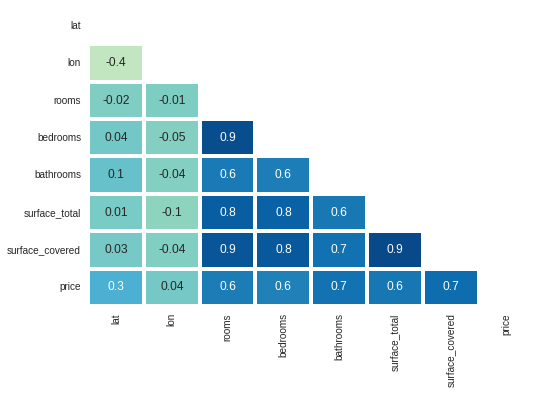

In [10]:
#correlacion: vale la pena dejar todas las variables?

correlacion_cl = dataproperati_cl.corr(method="spearman")

mask = np.triu(correlacion_cl)

sns.heatmap(correlacion_cl, annot=True, fmt=".1g", cbar=False, vmin=-1, vmax=1, linecolor="w", linewidths=3, mask=mask, cmap="GnBu")

In [36]:
#Dada la alta correlacion entre rooms y bedrooms, surface_covered y rooms, surface_covered y surface_total, se eliminan dos de ellos:

dataproperati_cl.drop(["surface_total", "bedrooms"], axis=1, inplace = True)

In [37]:
#Elimino variable target
dataproperati_cl.drop(["price"], axis=1, inplace = True)
#separo variables numéricas de categóricas
var_num= dataproperati_cl.select_dtypes(include="number").columns.tolist()


In [38]:
dataproperati_cl[var_num] = dataproperati_cl[var_num].astype('float32')

In [108]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [40]:
#imputamos valores NaN y escalamos variables numéricas
imputer_cl = KNNImputer()
scaler_cl = RobustScaler()

In [41]:
X_imp = imputer_cl.fit_transform(dataproperati_cl[var_num]) #imputo los nan

In [42]:
X_scal= pd.DataFrame(scaler_cl.fit_transform(X_imp), columns=var_num) #escalo los datos

In [43]:
X_scal.head()

,lat,lon,rooms,bathrooms,surface_covered
0,-0.07,0.62,2.00,1.00,1.01
1,-0.41,0.33,-0.50,1.00,-0.17
2,0.16,0.18,-0.50,0.00,-0.36
3,0.39,0.08,-0.50,0.00,-0.29
4,-5.84,5.25,-0.50,0.00,-0.51


In [107]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [45]:
# mod PRINCIPAL COMPONENT ANALYSIS:
pca = PCA().fit(X_scal)

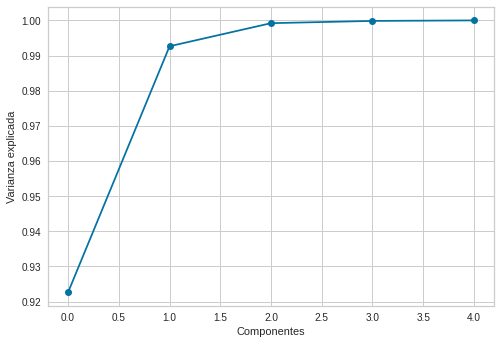

In [21]:
varianza = pca.explained_variance_ratio_.cumsum()

plt.plot(range(0, len(varianza)), varianza, marker='o')
plt.xlabel("Componentes")
plt.ylabel('Varianza explicada')
plt.show()

In [46]:
# A partir de la grafica, se decide tomar hasta 3 componentes o un 30% de los datos:
pca = PCA(n_components=3, random_state=42).fit(X_scal)

In [47]:
# se observa la tabla con cada atributo y el vector que que forma cada componente para ayudar a interpretar que tipo de informacion recoge cada uno:
pd.DataFrame(data=pca.components_,columns=X_scal.columns,index=['PC1', 'PC2','PC3' ])
#si vemmos el resultado, el PC1 nuclea todo en surface_total

,lat,lon,rooms,bathrooms,surface_covered
PC1,-0.00,-0.00,0.00,0.00,1.00
PC2,0.90,-0.44,-0.00,0.00,0.00
PC3,-0.44,-0.90,0.01,0.00,-0.00


In [48]:
table = pd.DataFrame(data=pca.components_,columns=X_scal.columns,index=['PC1', 'PC2', 'PC3']).T
table["loading"] = table.idxmax(axis=1)
table.sort_values(by="loading", inplace=True)
table

,PC1,PC2,PC3,loading
lon,-0.00,-0.44,-0.90,PC1
surface_covered,1.00,0.00,-0.00,PC1
lat,-0.00,0.90,-0.44,PC2
rooms,0.00,-0.00,0.01,PC3
bathrooms,0.00,0.00,0.00,PC3


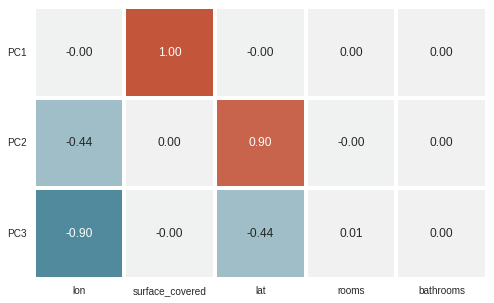

In [28]:
plt.figure(figsize=(25, 5))

ax = sns.heatmap(table.drop(labels=["loading"], axis=1).T,
                 vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt=".2f", linecolor="w", linewidths=3, cbar=False)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0
)
plt.show()

In [49]:
X_scal = pd.DataFrame(pca.transform(X_scal), columns=["PC1", "PC2", 'PC3'])

In [50]:
X_scal.head()

,PC1,PC2,PC3
0,-3.33,-0.41,-0.75
1,-4.52,-0.60,-0.35
2,-4.72,-0.02,-0.46
3,-4.64,0.23,-0.48
4,-4.84,-7.64,-2.37


In [51]:
Modelo_km = KMeans(random_state=42) #instancio el mod
Modelo_km.fit(X_scal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

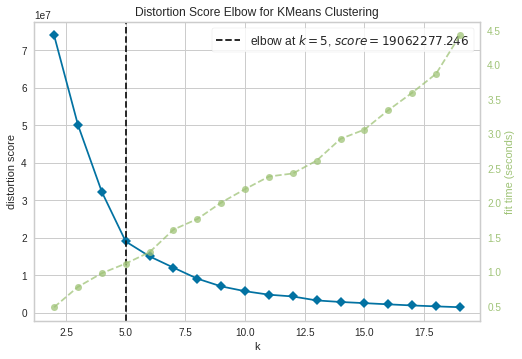

In [27]:
visualizer = KElbowVisualizer(estimator=Modelo_km, k=(2, 20)).fit(X_scal) #lo aplico
visualizer.show()

In [52]:
kmeans = KMeans(n_clusters=5, random_state=42)

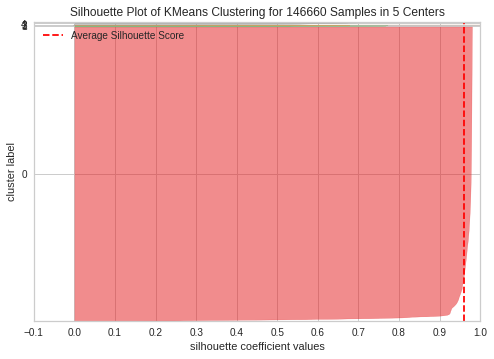

In [ ]:
silhouette = SilhouetteVisualizer(estimator=kmeans).fit(X_scal)
silhouette.show()

In [53]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_scal)
centroides = kmeans.cluster_centers_
print(centroides)


[[-3.5525889e+00 -2.9509611e-02 -5.5864477e-03]
 [ 3.8506711e+02  2.7118897e-01 -9.0827271e-02]
 [ 8.5636713e+02  1.1568950e+00 -8.5446256e-01]
 [-1.1446886e+01  2.5656692e+03  1.4357520e+02]
 [ 1.1093621e+02 -7.8646511e-01  4.5275718e-01]]


In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42).fit(X_scal)
y_kmeans = kmeans.fit_predict(X_scal)

In [ ]:
centroides = kmeans.cluster_centers_
print(centroides)

[[-3.5525889e+00 -2.9509611e-02 -5.5864477e-03]
 [ 3.8506711e+02  2.7118897e-01 -9.0827271e-02]
 [ 8.5636713e+02  1.1568950e+00 -8.5446256e-01]
 [-1.1446886e+01  2.5656692e+03  1.4357520e+02]
 [ 1.1093621e+02 -7.8646511e-01  4.5275718e-01]]


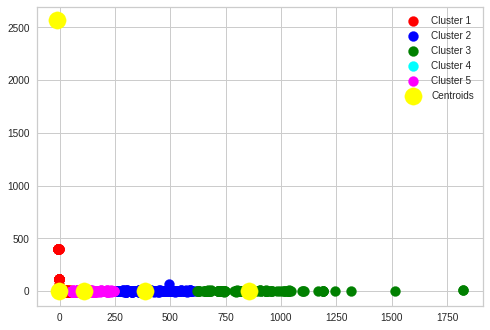

In [ ]:
X_scal = X_scal.values
plt.scatter(X_scal[y_kmeans == 0, 0], X_scal[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scal[y_kmeans == 1, 0], X_scal[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scal[y_kmeans == 2, 0], X_scal[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scal[y_kmeans == 3, 0], X_scal[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scal[y_kmeans == 4, 0], X_scal[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

O en 3D

In [ ]:
X_scal["cluster"] = pd.Series(kmeans.predict(X_scal)).apply(lambda x: f"cluster_{int(x + 1)}")

In [ ]:
colors = {key: value for key, value in zip(sorted(X_scal["cluster"].unique()), ["r", "g", "b", "y", "k"])}

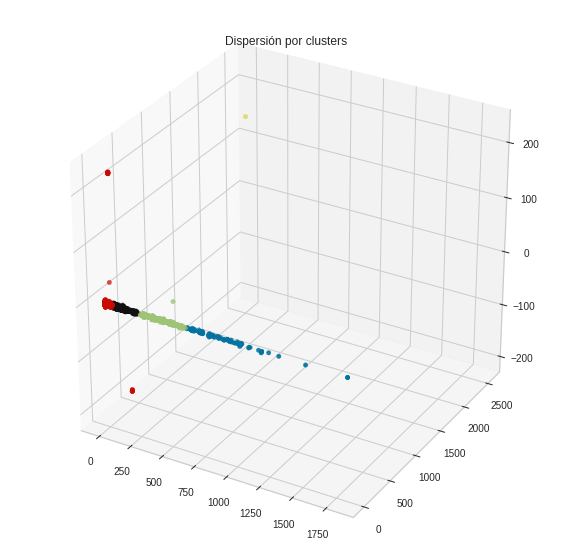

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter3D(X_scal["PC1"], X_scal["PC2"], X_scal["PC3"], color=X_scal["cluster"].map(colors))
plt.title("Dispersión por clusters")
plt.show()

In [98]:
from mpl_toolkits.mplot3d import Axes3D

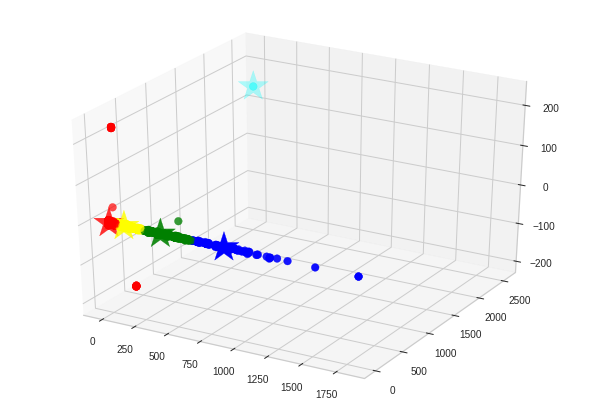

In [ ]:
X_scal = X_scal.values
# Predicting the clusters
labels = kmeans.predict(X_scal)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_scal[:, 0], X_scal[:, 1], X_scal[:, 2], c=asignar,s=60) 
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Si Decido utilizar un DS preprocesado, quitando valores atípicos, obtengo otro  resultado.

En esta ocasión, utilizo el DS con valores atípicos convertidos a nan e imputados con KNNImputer

In [99]:
dataproperati_cl_2 = dataproperati_copia_3.copy()

In [100]:
dataproperati_cl_2.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.00,4.60,2.00,140.00,140.00,153000.00,Departamento
1,Capital Federal,Boedo,2.00,3.80,2.00,70.00,58.00,159000.00,PH
2,Capital Federal,Palermo,2.00,2.60,1.00,55.40,45.00,125000.00,PH
3,Capital Federal,Palermo,2.00,2.60,1.00,85.00,50.00,295000.00,PH
5,Capital Federal,Villa Crespo,2.00,2.60,1.00,56.00,56.00,150000.00,PH


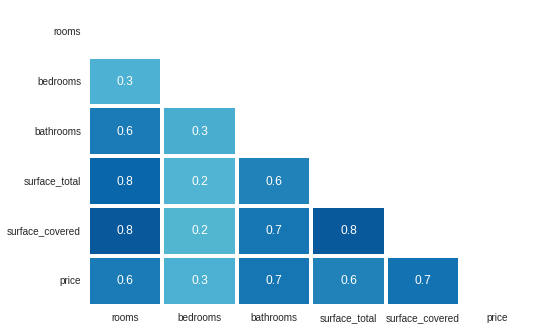

In [119]:
correlacion_cl_2 = dataproperati_cl_2.corr(method="spearman")

mask_2 = np.triu(correlacion_cl_2)

sns.heatmap(correlacion_cl_2, annot=True, fmt=".1g", cbar=False, vmin=-1, vmax=1, linecolor="w", linewidths=3, mask=mask_2, cmap="GnBu")

In [101]:
#Elimino variable target 
dataproperati_cl_2.drop(["price"], axis=1, inplace = True)
#separo variables numéricas de categóricas
var_num_2= dataproperati_cl_2.select_dtypes(include="number").columns.tolist()

In [102]:
dataproperati_cl_2[var_num_2] = dataproperati_cl_2[var_num_2].astype('float32')

In [103]:
imputer_cl_2 = KNNImputer()
scaler_cl_2 = RobustScaler() #Solo scaler porque ya estan imputados los nan

In [105]:
X_imp_2 = imputer_cl_2.fit_transform(dataproperati_cl_2[var_num_2]) #imputo los nan
X_scal_2= pd.DataFrame(scaler_cl_2.fit_transform(X_imp_2), columns=var_num_2) #escalo los datos

In [109]:
# mod PRINCIPAL COMPONENT ANALYSIS:
pca_2 = PCA().fit(X_scal_2)

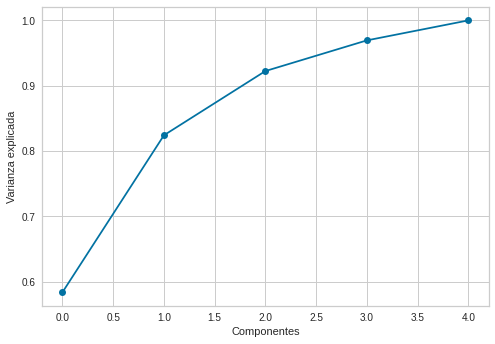

In [110]:
varianza_2 = pca_2.explained_variance_ratio_.cumsum()

plt.plot(range(0, len(varianza_2)), varianza_2, marker='o')
plt.xlabel("Componentes")
plt.ylabel('Varianza explicada')
plt.show()

In [111]:
pca_2 = PCA(n_components=4, random_state=42).fit(X_scal_2)

In [112]:
# se observa la tabla con cada atributo y el vector que forma cada componente para ayudar a interpretar que tipo de informacion recoge cada uno:
pd.DataFrame(data=pca_2.components_,columns=X_scal_2.columns,index=['PC1', 'PC2','PC3', 'PC4'])


,rooms,bedrooms,bathrooms,surface_total,surface_covered
PC1,0.34,0.36,0.31,0.63,0.51
PC2,0.00,-0.89,-0.05,0.44,0.11
PC3,-0.35,0.28,-0.67,0.54,-0.24
PC4,-0.41,0.05,0.67,0.30,-0.54


In [113]:
table_2 = pd.DataFrame(data=pca_2.components_,columns=X_scal_2.columns,index=['PC1', 'PC2', 'PC3', 'PC4']).T
table_2["loading"] = table_2.idxmax(axis=1)
table_2.sort_values(by="loading", inplace=True)
table_2

,PC1,PC2,PC3,PC4,loading
rooms,0.34,0.00,-0.35,-0.41,PC1
bedrooms,0.36,-0.89,0.28,0.05,PC1
surface_total,0.63,0.44,0.54,0.30,PC1
surface_covered,0.51,0.11,-0.24,-0.54,PC1
bathrooms,0.31,-0.05,-0.67,0.67,PC4


Tengo que

PC1: Rooms 0.34, beedroms 0.36, surface_total 0.63, surface_covered 0.51, bathrooms 0.31

PC2: Rooms 0.00, beedroms -0.89, surface_total 0.44, surface_covered 0.11, bathrooms -0.05

PC3: Rooms -0.35, beedroms 0.28, surface_total 0.54, surface_covered -0.24, bathrooms -0.67

PC4: Rooms -0.41, beedroms 0.05, surface_total 0.30, surface_covered -0.54, bathrooms 0.67

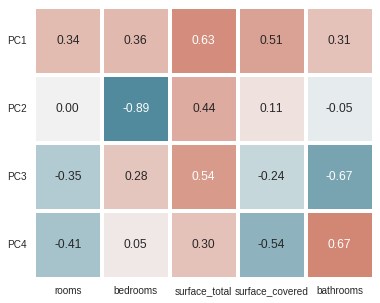

In [115]:
plt.figure(figsize=(25, 5))

ax = sns.heatmap(table_2.drop(labels=["loading"], axis=1).T,
                 vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt=".2f", linecolor="w", linewidths=3, cbar=False)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0
)
plt.show()

In [116]:
X_scal_2 = pd.DataFrame(pca_2.transform(X_scal_2), columns=["PC1", "PC2", 'PC3','PC4' ])
X_scal_2.head()

,PC1,PC2,PC3,PC4
0,2.22,-1.64,-0.53,-0.83
1,-0.13,-1.44,0.02,0.68
2,-1.08,-0.42,0.33,0.03
3,-0.83,-0.26,0.48,0.08
4,-0.99,-0.40,0.29,-0.07


In [212]:
Modelo_km_2 = KMeans(random_state=42) #instancio el mod
Modelo_km_2.fit(X_scal_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

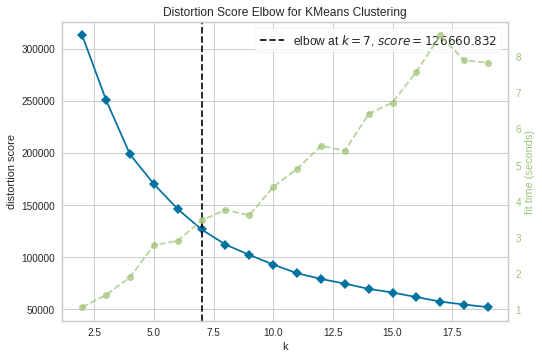

In [ ]:
visualizer_2 = KElbowVisualizer(estimator=Modelo_km_2, k=(2, 20)).fit(X_scal_2) #lo aplico
visualizer_2.show()

In [213]:
kmeans_2 = KMeans(n_clusters=7, random_state=42)

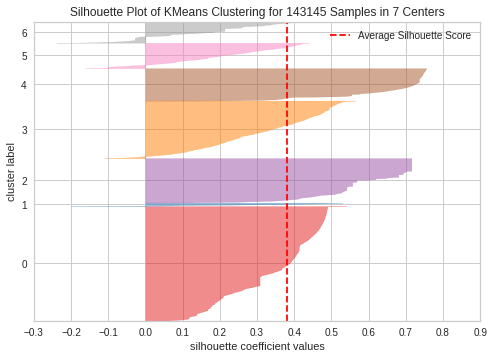

In [ ]:
silhouette_2 = SilhouetteVisualizer(estimator=kmeans_2).fit(X_scal_2)
silhouette_2.show()

In [214]:
kmeans_2 = KMeans(n_clusters=7, random_state=42).fit(X_scal_2)
centroides_2 = kmeans_2.cluster_centers_
print(centroides_2)

[[-0.7151749   0.07663664 -0.0534534  -0.10793776]
 [ 5.7661324   2.7551575   2.1177552   0.9578467 ]
 [-0.6793376  -1.2989774   0.6406359   0.26744205]
 [ 1.0033696  -0.24575044 -0.5435727   0.04952785]
 [-1.6567811   1.0546612  -0.19347951  0.03019676]
 [ 2.909716   -0.45485178 -0.17254531 -0.1986335 ]
 [ 0.6786319   1.478077    0.58072656 -0.07824682]]


In [215]:
kmeans_2 = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42).fit(X_scal_2)
y_kmeans_2 = kmeans_2.fit_predict(X_scal_2)

In [193]:
#grfico
X_scal_2["cluster"] = pd.Series(kmeans_2.predict(X_scal_2)).apply(lambda x: f"cluster_{int(x + 1)}")
X_scal_2.head()

,PC1,PC2,PC3,PC4,cluster
0,2.22,-1.64,-0.53,-0.83,cluster_6
1,-0.13,-1.44,0.02,0.68,cluster_3
2,-1.08,-0.42,0.33,0.03,cluster_1
3,-0.83,-0.26,0.48,0.08,cluster_1
4,-0.99,-0.40,0.29,-0.07,cluster_1


In [194]:
X_scal_2.value_counts(["cluster"]).sort_values(ascending = False)

cluster  
cluster_1    54926
cluster_4    27544
cluster_3    21300
cluster_5    15515
cluster_6    12178
cluster_7    10007
cluster_2     1675
dtype: int64

Conclusioes clustering

Al trabajar con varianzas, el método PCA es altamente sensible a outliers, por lo que es recomendable estudiar si los hay. Por este motivo el primer modelo no es tan bueno como el segundo. 

La presencia de valores atípicos modifica la configuración de centroides (sobre todo cuando se utiliza la distancia euclidiana): se busca agrupar observaciones que minimicen la distancia, y esto se traduce en una mayor influencia de aquellas observaciones que están más distantes.


¿Cuanta información es capaz de capturar cada una de las componentes principales obtenidas? Para contestar a estas preguntas se recurre a la proporción de varianza explicada por cada componente principal.

Siendo el objetivo del PCA reducir la dimensionalidad, suelen ser de interés utilizar el número mínimo de componentes que resultan suficientes para explicar los datos. No existe una respuesta o método único que permita identificar cual es el número óptimo de componentes principales a utilizar. Una forma de proceder muy extendida consiste en evaluar la proporción de varianza explicada acumulada y seleccionar el número de componentes mínimo a partir del cual el incremento deja de ser sustancial.(método KElbowVisualizer o del codo para seleccionar el numero óptimos de componentes)

Cuando contamos con un gran número de variables cuantitativas posiblemente correlacionadas (indicativo de existencia de información redundante), PCA permite reducirlas a un número menor de variables transformadas (componentes principales) que expliquen gran parte de la variabilidad en los datos. Cada dimensión o componente principal generada por PCA será una combinación lineal de las variables originales, y serán además independientes o no correlacionadas entre sí.

La elección se realiza de manera que la primera componente principal sea la de mayor varianza; la segunda debe tener la máxima variabilidad no tomada por la primera, y así sucesivamente, eligiendo un número que tenga un porcentaje suficiente de varianza total.
Los "loadings" dan idea sobre qué peso tiene cada variable en cada componente.

La puntuación de silueta se utiliza para evaluar la calidad de los clústeres creados mediante el modelo K-Means en términos de qué tan bien se agrupan los datos con otros datos que son similares entre sí. La puntuación de Silhouette se calcula para cada dato de diferentes clusters. El valor de la puntuación varía de -1 a 1. Si la puntuación es 1, el grupo es denso y está bien separado que otros grupos. Un valor cercano a 0 representa clusters superpuestos con muestras muy cercanas al límite de decisión de los clusters vecinos. Una puntuación negativa [-1, 0] indica que las muestras pueden haber sido asignadas a grupos incorrectos

Vemos que, en este caso, cluster 6, 5, 3 y 1 tienen puntuaciones menores a 0, lo cual indica que los datos podrían haber sido asignados a grupos incorrectos.
Si bien la mayoria de los cluster están por encima del promedio (a excepción del cluster 6) sus tamaños no son uniformes, por lo que sería conveniente probar con un numero de cluster más reducido.